URLをまとめて取得

In [4]:
from urllib import request
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd

base_url = "https://kabuoji3.com/stock/"
html = request.urlopen(base_url)
soup = BeautifulSoup(html,"html.parser")
url = []
for i in soup.find_all("a"):
    url.append(''.join(list(urljoin(base_url, i.get("href")))))
    
URL = pd.DataFrame(url)
# print(URL)
URL = URL.drop(range(0,8))
URL = URL.drop(range(128, 175))
URL = URL.reset_index(drop=True)
print(URL)


                                    0
0    https://kabuoji3.com/stock/1301/
1    https://kabuoji3.com/stock/1305/
2    https://kabuoji3.com/stock/1306/
3    https://kabuoji3.com/stock/1308/
4    https://kabuoji3.com/stock/1309/
5    https://kabuoji3.com/stock/1310/
6    https://kabuoji3.com/stock/1311/
7    https://kabuoji3.com/stock/1312/
8    https://kabuoji3.com/stock/1320/
9    https://kabuoji3.com/stock/1321/
10   https://kabuoji3.com/stock/1322/
11   https://kabuoji3.com/stock/1323/
12   https://kabuoji3.com/stock/1324/
13   https://kabuoji3.com/stock/1325/
14   https://kabuoji3.com/stock/1326/
15   https://kabuoji3.com/stock/1327/
16   https://kabuoji3.com/stock/1328/
17   https://kabuoji3.com/stock/1329/
18   https://kabuoji3.com/stock/1330/
19   https://kabuoji3.com/stock/1332/
20   https://kabuoji3.com/stock/1333/
21   https://kabuoji3.com/stock/1343/
22   https://kabuoji3.com/stock/1344/
23   https://kabuoji3.com/stock/1345/
24   https://kabuoji3.com/stock/1346/
25   https:/

終値をグラフ化　完成版

In [10]:
# 終値をグラフ化　完成版

import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

url = "https://kabuoji3.com/stock/1301/"
dfs = pd.read_html(url)
print(dfs[0]["終値"])

# 日付と終値を取得
date = pd.DataFrame()
d = pd.DataFrame()
for i in range(0,2):
    date = date.append(dfs[i]["日付"])
    d = d.append(dfs[i]["終値"])
date_ = date.T
data = d.T
#data.to_csv("Price_test.csv")
#date_.to_csv("Date_test.csv")

# 日付データを0列と1列に分ける
date_1 = date_.iloc[:,[0]]
date_2 = date_.iloc[:,[1]]
# 縦に連結
con_date = pd.concat([date_1, date_2], axis=0)
# 終値データを0列と1列に分ける
data_1 = data.iloc[:,[0]]
data_2 = data.iloc[:,[1]]
# 縦に連結
con_data = pd.concat([data_1, data_2], axis=0)
# 日付と終値を連結
con = pd.concat([con_date, con_data], axis=1)
# リストワイズ削除
con_Table = con.dropna()
# 日付をindexにする
set_ = con_Table.set_index("日付")
set_.to_csv("Stock_test.csv")

# グラフの作成
file_name = "Stock_test.csv"
x = []
y = []
csv_data = pd.read_csv(file_name)
a = list(pd.to_datetime(csv_data["日付"]))
x += a[::1]
y = csv_data["終値"]

sma75 = pd.DataFrame.rolling(y, window=75, center=True).mean()
sma25 = pd.DataFrame.rolling(y, window=25, center=True).mean()

plt.figure(figsize=(11,7))
plt.xlabel('Year-Month')
plt.ylabel('Stock Price')
plt.title('1301', fontsize=18)
plt.plot(x, y, color='blue', linewidth=0.9, linestyle="-", label="Price")
plt.plot(x, sma75, color='g', linewidth=0.9, linestyle="-", label="sma75")
plt.plot(x, sma25, color='r', linewidth=0.9, linestyle="-", label="sma25")
plt.xticks(rotation=15)
plt.tick_params(labelsize=14)
plt.legend()
plt.show()
plt.savefig('1301.png') 

0      2771
1      2770
2      2789
3      2830
4      2861
5      2836
6      2796
7      2938
8      3000
9      3040
10     3015
11     3035
12     2994
13     3050
14     2996
15     3010
16     3015
17     3015
18     2959
19     2924
20     3000
21     3005
22     3020
23     3010
24     3000
25     3005
26     2990
27     2975
28     2982
29     2993
       ... 
121    3330
122    3340
123    3365
124    3380
125    3400
126    3395
127    3485
128    3385
129    3310
130    3320
131    3330
132    3280
133    3185
134    3140
135    3095
136    3095
137    3130
138    3115
139    3120
140    3215
141    3200
142    3115
143    3145
144    3195
145    3220
146    3225
147    3225
148    3260
149    3250
150    3290
Name: 終値, Length: 151, dtype: int64


In [8]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
file_name = "Stock_test.csv"
x = []
y = []
csv_data = pd.read_csv(file_name)
a = list(pd.to_datetime(csv_data["日付"]))
x += a[::1]
y = csv_data["終値"]

sma75 = pd.DataFrame.rolling(y, window=75, center=True).mean()
sma25 = pd.DataFrame.rolling(y, window=20, center=True).mean()

plt.figure(figsize=(11,7))
plt.xlabel('Year-Month')
plt.ylabel('Stock Price')
plt.title('1301', fontsize=18)
plt.plot(x, y, color='blue', linewidth=0.9, linestyle="-", label="Price")
plt.plot(x, sma75, color='g', linewidth=1, linestyle="-", label="sma75", marker="o")
plt.plot(x, sma25, color='r', linewidth=1, linestyle="-", label="sma25", marker=".")
plt.xticks(rotation=15)
plt.tick_params(labelsize=14)
plt.legend()
plt.show()
plt.savefig('1301.png') 

株価データ取得

In [ ]:
# 株価データ取得 vr1
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

url = "https://kabuoji3.com/stock/1301/"
dfs = pd.read_html(url)
# print(dfs)

data = pd.DataFrame()
data4 = pd.DataFrame()
for j in ["日付","始値","高値","安値","終値","出来高","終値調整"]:
    df = pd.DataFrame()
    for i in range(0,2):
        df = df.append(dfs[i][j])
    df = df.T
    data1 = df.iloc[:,[0]]
    data2 = df.iloc[:,[1]]
    data3 = pd.concat([data1, data2])
    data3 = data3.reset_index(drop=True)
    data3 = data3.dropna()
#     print(data3.head())
    if j == ["日付"]:
        data4 = data3
    else:
        data4 = pd.concat([data4, data3], axis=1)
print(data4)

株価データ取得 v.1

In [ ]:
# 株価データ取得 vr1
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

u = pd.read_csv("stock_URL.csv", index_col=0)
for i in u.iloc[[k for k in range(0,120)],0]:
    url = i
    dfs = pd.read_html(url)

    data = pd.DataFrame()
    data4 = pd.DataFrame()
    for j in ["日付","始値","高値","安値","終値","出来高","終値調整"]:
        df = pd.DataFrame()
        for i in range(0,2):
            df = df.append(dfs[i][j])
        df = df.T
        data1 = df.iloc[:,[0]]
        data2 = df.iloc[:,[1]]
        data3 = pd.concat([data1, data2])
        data3 = data3.reset_index(drop=True)
        data3 = data3.dropna()
    #     print(data3.head())
        if j == ["日付"]:
            data4 = data3
        else:
            data4 = pd.concat([data4, data3], axis=1)
    # print(data4)

    data4.to_csv("Stock_Data_" + str(url.split('/')[4]) + ".csv")

株価データ取得　完成版

In [ ]:
# 株価データ取得 完成版
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

u = pd.read_csv("stock_URL.csv", index_col=0)
for i in u.iloc[[k for k in range(0,120)],0]:
    print(i)
    url = i
    dfs = pd.read_html(url)

    data = pd.DataFrame()
    data4 = pd.DataFrame()
    for j in ["日付","始値","高値","安値","終値","出来高","終値調整"]:
        df = pd.DataFrame()
        for i in range(0,2):
            k = pd.DataFrame(dfs)
#             print(k)
            x = 0
            if len(k.index)==1 and i==1:
                x = 2
                continue
                df = df.append(dfs[i][j])  # IndexError: list index out of range
            else:
                df = df.append(dfs[i][j])
        df = df.T
#         print(df)
        data1 = df.iloc[:,[0]]
        if x == 2:
            data1 = data1.dropna()
        else:
            data2 = df.iloc[:,[1]]
            data3 = pd.concat([data1, data2])
            data3 = data3.reset_index(drop=True)
            data1 = data3.dropna()
    #     print(data3.head())
        if j == ["日付"]:
            data4 = data1
        else:
            data4 = pd.concat([data4, data1], axis=1)
    # print(data4)

    data4.to_csv("Stock_Data_" + str(url.split('/')[4]) + ".csv")

チャートにプロット

In [3]:

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

# TODO: テーブルデータを読み込む
u = pd.read_csv("stock_URL.csv", index_col=0)
for i in u.iloc[[k for k in range(0,120)],0]:
    x = []
    y = []
    num = i.split('/')[4]
    
    url_name = pd.read_csv("Stock_Data_" + str(num) + ".csv", index_col=0)
    d = pd.DataFrame(url_name.loc[:,["日付","終値"]])
    x = d["日付"]
    x = list(x[-1::-1])
#     print(x)
    y = d["終値"]
    y = y[-1::-1]
#     print(y)
    sma75 = pd.DataFrame.rolling(y, window=75, center=True).mean()
    sma25 = pd.DataFrame.rolling(y, window=20, center=True).mean()

    plt.figure(figsize=(11,7))
    plt.xlabel('Year-Month')
    plt.ylabel('Stock Price')
    plt.title(str(num), fontsize=18)
    plt.plot(x, y, color='blue', linewidth=0.9, linestyle="-", label="Price")
    plt.plot(x, sma75, color='g', linewidth=1, linestyle="-", label="sma75", marker="o")
    plt.plot(x, sma25, color='r', linewidth=1, linestyle="-", label="sma20", marker=".")
    ticks = 40
    plt.xticks(x[::ticks])
    plt.xticks(rotation=15)
    plt.tick_params(labelsize=14)
    plt.legend()
    plt.show()
#     plt.savefig(str(num) + '.png') 

FileNotFoundError: [Errno 2] File b'Stock_Data_1301.csv' does not exist: b'Stock_Data_1301.csv'

データの収集からプロットまで　最終完成版

In [18]:

import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

def Make_Stock_Table():
    u = pd.read_csv("stock_URL.csv", index_col=0)
    for i in u.iloc[[k for k in range(0,120)],0]:
        print(i)
        url = i
        dfs = pd.read_html(url)

        data = pd.DataFrame()
        data4 = pd.DataFrame()
        for j in ["日付","始値","高値","安値","終値","出来高","終値調整"]:
            df = pd.DataFrame()
            for i in range(0,2):
                k = pd.DataFrame(dfs)
    #             print(k)
                x = 0
                if len(k.index)==1 and i==1:
                    x = 2
                    continue
                    df = df.append(dfs[i][j])  # IndexError: list index out of range
                else:
                    df = df.append(dfs[i][j])
            df = df.T
    #         print(df)
            data1 = df.iloc[:,[0]]
            if x == 2:
                data1 = data1.dropna()
            else:
                data2 = df.iloc[:,[1]]
                data3 = pd.concat([data1, data2])
                data3 = data3.reset_index(drop=True)
                data1 = data3.dropna()
        #     print(data3.head())
            if j == ["日付"]:
                data4 = data1
            else:
                data4 = pd.concat([data4, data1], axis=1)
        # print(data4)

        data4.to_csv("Stock_Data_" + str(url.split('/')[4]) + ".csv")
        
# TODO: グラフ作成
def Make_Stock_Chart():
    u = pd.read_csv("stock_URL.csv", index_col=0)
    for i in u.iloc[[k for k in range(0,120)],0]:
        x = []
        y = []
        num = i.split('/')[4]

        url_name = pd.read_csv("Stock_Data_" + str(num) + ".csv", index_col=0)
        d = pd.DataFrame(url_name.loc[:,["日付","終値"]])
        x = d["日付"]
        x = list(x[-1::-1])
    #     print(x)
        y = d["終値"]
        y = y[-1::-1]
    #     print(y)
        sma75 = pd.DataFrame.rolling(y, window=75, center=True).mean()
        sma25 = pd.DataFrame.rolling(y, window=20, center=True).mean()

        plt.figure(figsize=(11,7))
        plt.xlabel('Year-Month')
        plt.ylabel('Stock Price')
        plt.title(str(num), fontsize=18)
        plt.plot(x, y, color='blue', linewidth=0.9, linestyle="-", label="Price")
        plt.plot(x, sma75, color='g', linewidth=1, linestyle="-", label="sma75", marker="o")
        plt.plot(x, sma25, color='r', linewidth=1, linestyle="-", label="sma20", marker=".")
        ticks = 40
        plt.xticks(x[::ticks])
        plt.xticks(rotation=15)
        plt.tick_params(labelsize=14)
        plt.legend()
        plt.show()
        plt.savefig(str(num) + '.png') 
    
    
if __name__ == '__main__':
    Make_Stock_Table()
    Make_Stock_Chart()
    

https://kabuoji3.com/stock/1301/
https://kabuoji3.com/stock/1305/
https://kabuoji3.com/stock/1306/
https://kabuoji3.com/stock/1308/
https://kabuoji3.com/stock/1309/
https://kabuoji3.com/stock/1310/
https://kabuoji3.com/stock/1311/
https://kabuoji3.com/stock/1312/
https://kabuoji3.com/stock/1320/
https://kabuoji3.com/stock/1321/
https://kabuoji3.com/stock/1322/
https://kabuoji3.com/stock/1323/
https://kabuoji3.com/stock/1324/
https://kabuoji3.com/stock/1325/
https://kabuoji3.com/stock/1326/
https://kabuoji3.com/stock/1327/
https://kabuoji3.com/stock/1328/
https://kabuoji3.com/stock/1329/
https://kabuoji3.com/stock/1330/
https://kabuoji3.com/stock/1332/
https://kabuoji3.com/stock/1333/
https://kabuoji3.com/stock/1343/
https://kabuoji3.com/stock/1344/
https://kabuoji3.com/stock/1345/
https://kabuoji3.com/stock/1346/
https://kabuoji3.com/stock/1348/
https://kabuoji3.com/stock/1349/
https://kabuoji3.com/stock/1352/
https://kabuoji3.com/stock/1356/
https://kabuoji3.com/stock/1357/
https://ka

In [16]:
# 株価データ取得 vr1
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

def Make_Stock_Table():
    u = pd.read_csv("stock_URL.csv", index_col=0)
    for i in u.iloc[[k for k in range(0,120)],0]:
        print(i)
        url = i
        dfs = pd.read_html(url)

        data = pd.DataFrame()
        data4 = pd.DataFrame()
        for j in ["日付","始値","高値","安値","終値","出来高","終値調整"]:
            df = pd.DataFrame()
            for i in range(0,2):
                k = pd.DataFrame(dfs)
    #             print(k)
                x = 0
                if len(k.index)==1 and i==1:
                    x = 2
                    continue
                    df = df.append(dfs[i][j])  # IndexError: list index out of range
                else:
                    df = df.append(dfs[i][j])
            df = df.T
    #         print(df)
            data1 = df.iloc[:,[0]]
            if x == 2:
                data1 = data1.dropna()
            else:
                data2 = df.iloc[:,[1]]
                data3 = pd.concat([data1, data2])
                data3 = data3.reset_index(drop=True)
                data1 = data3.dropna()
        #     print(data3.head())
            if j == ["日付"]:
                data4 = data1
            else:
                data4 = pd.concat([data4, data1], axis=1)
        # print(data4)

        data4.to_csv("Stock_Data_" + str(url.split('/')[4]) + ".csv")
        
# TODO: グラフ作成
def Make_Stock_Chart():
    u = pd.read_csv("stock_URL.csv", index_col=0)
    for i in u.iloc[[k for k in range(0,120)],0]:
        x = []
        y = []
        num = i.split('/')[4]

        url_name = pd.read_csv("Stock_Data_" + str(num) + ".csv", index_col=0)
        d = pd.DataFrame(url_name.loc[:,["日付","終値"]])
        x = d["日付"]
        x = list(x[-1::-1])
    #     print(x)
        y = d["終値"]
        y = y[-1::-1]
    #     print(y)
        sma75 = pd.DataFrame.rolling(y, window=75, center=True).mean()
        sma25 = pd.DataFrame.rolling(y, window=20, center=True).mean()

        plt.figure(figsize=(11,7))
        plt.xlabel('Year-Month')
        plt.ylabel('Stock Price')
        plt.title(str(num), fontsize=18)
        plt.plot(x, y, color='blue', linewidth=0.9, linestyle="-", label="Price")
        plt.plot(x, sma75, color='g', linewidth=1, linestyle="-", label="sma75", marker="o")
        plt.plot(x, sma25, color='r', linewidth=1, linestyle="-", label="sma20", marker=".")
        ticks = 40
        plt.xticks(x[::ticks])
        plt.xticks(rotation=15)
        plt.tick_params(labelsize=14)
        plt.legend()
        plt.show()
        plt.savefig(str(num) + '.png') 
    
    
if __name__ == '__main__':
    Make_Stock_Table()
    Make_Stock_Chart()
    

https://kabuoji3.com/stock/1301/
https://kabuoji3.com/stock/1305/
https://kabuoji3.com/stock/1306/
https://kabuoji3.com/stock/1308/
https://kabuoji3.com/stock/1309/
https://kabuoji3.com/stock/1310/
https://kabuoji3.com/stock/1311/
https://kabuoji3.com/stock/1312/
https://kabuoji3.com/stock/1320/
https://kabuoji3.com/stock/1321/
https://kabuoji3.com/stock/1322/
https://kabuoji3.com/stock/1323/
https://kabuoji3.com/stock/1324/
https://kabuoji3.com/stock/1325/
https://kabuoji3.com/stock/1326/
https://kabuoji3.com/stock/1327/
https://kabuoji3.com/stock/1328/
https://kabuoji3.com/stock/1329/
https://kabuoji3.com/stock/1330/
https://kabuoji3.com/stock/1332/
https://kabuoji3.com/stock/1333/
https://kabuoji3.com/stock/1343/
https://kabuoji3.com/stock/1344/
https://kabuoji3.com/stock/1345/
https://kabuoji3.com/stock/1346/
https://kabuoji3.com/stock/1348/
https://kabuoji3.com/stock/1349/
https://kabuoji3.com/stock/1352/
https://kabuoji3.com/stock/1356/
https://kabuoji3.com/stock/1357/
https://ka

/Users/tk/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/tk/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/tk/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/tk/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/tk/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/

['stock1301', 'stock1305', 'stock1306', 'stock1308', 'stock1309', 'stock1310', 'stock1311', 'stock1312', 'stock1320', 'stock1321']


stock+num: stock1311


,日付,始値,高値,安値,終値,出来高,終値調整
0,2019-04-16,753,756,752,753,4120,753
1,2018-08-30,785,785,775,776,1680,776


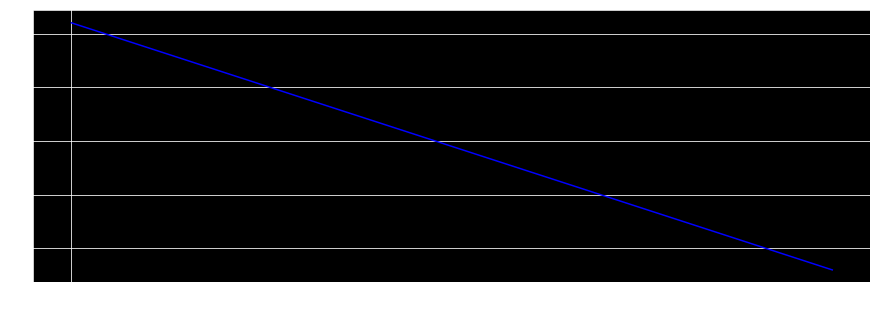

In [15]:
import pprint
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from tqdm import tqdm

    
url = pd.read_csv("stock_URL.csv", index_col=0)
dict = {}
url_list = []

# URLの読み込み
pbar = tqdm(url.iloc[[k for k in range(0,10)], 0],
            desc='first loop', leave=True)
for i in pbar: # TODO:rangeの第2引数にはlen(url)を格納
    dfs = pd.read_html(i)
    num = i.split('/')[4]
    len_1 = len(dfs)
    
    df_sub = pd.DataFrame()
    df_Table = pd.DataFrame()
    
    for col in ["日付","始値","高値","安値","終値","出来高","終値調整"]:
        
        for l in range(0, len_1):
            df = pd.DataFrame(dfs)
            
            if l == 0:
                df_sub = dfs[l][col]
            else:
                df_sub = df_sub.append(dfs[l][col])
        df_con = df_sub.reset_index(drop=True)
        
        if col == ["日付"]:
            df_Table = df_con
        else:
            df_Table = pd.concat([df_Table, df_con], axis=1)
            
    # df_Tableを辞書に格納
    p = i.split('/')[3:5]
    a = "".join(p)
    url_list.extend([a])
#     print(a)
    dict[a] = df_Table.values.tolist()
    
print(url_list)
pbar.close()
    
# stock1301のように欲しい株価のキーを入力する
single_table = pd.DataFrame(dict[input("stock+num:")])
single_table.columns = ["日付","始値","高値","安値","終値","出来高","終値調整"]
display(single_table)
    
    
x = single_table["日付"][-1::-1]
l = single_table["始値"][-1::-1]
y = single_table["終値"][-1::-1]
ma75 = pd.DataFrame.rolling(y, window=75, center=True).mean()
ma25 = pd.DataFrame.rolling(y, window=25, center=True).mean()

plt.figure(figsize=(15,5))
plt.plot(x, y, color='b')
plt.plot(x, ma75, color='g', linewidth=1.7, label='ma75')
plt.plot(x, ma25, color='tomato', linewidth=1.7, label='ma25')
ticks = 40
plt.xticks(x[::ticks], rotation=15)
# plt.style.use('dark_background')
# plt.legend()
plt.grid()
plt.show()
        
            

In [4]:
from urllib import request
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd

base_url = "https://kabuoji3.com/stock/"
html = request.urlopen(base_url)
soup = BeautifulSoup(html,"html.parser")
url = []
for i in soup.find_all("a"):
    url.append(''.join(list(urljoin(base_url, i.get("href")))))
    
URL = pd.DataFrame(url)
# print(URL)
URL = URL.drop(range(0,8))
URL = URL.drop(range(128, 175))
URL = URL.reset_index(drop=True)
print(URL)


                                    0
0    https://kabuoji3.com/stock/1301/
1    https://kabuoji3.com/stock/1305/
2    https://kabuoji3.com/stock/1306/
3    https://kabuoji3.com/stock/1308/
4    https://kabuoji3.com/stock/1309/
5    https://kabuoji3.com/stock/1310/
6    https://kabuoji3.com/stock/1311/
7    https://kabuoji3.com/stock/1312/
8    https://kabuoji3.com/stock/1320/
9    https://kabuoji3.com/stock/1321/
10   https://kabuoji3.com/stock/1322/
11   https://kabuoji3.com/stock/1323/
12   https://kabuoji3.com/stock/1324/
13   https://kabuoji3.com/stock/1325/
14   https://kabuoji3.com/stock/1326/
15   https://kabuoji3.com/stock/1327/
16   https://kabuoji3.com/stock/1328/
17   https://kabuoji3.com/stock/1329/
18   https://kabuoji3.com/stock/1330/
19   https://kabuoji3.com/stock/1332/
20   https://kabuoji3.com/stock/1333/
21   https://kabuoji3.com/stock/1343/
22   https://kabuoji3.com/stock/1344/
23   https://kabuoji3.com/stock/1345/
24   https://kabuoji3.com/stock/1346/
25   https:/

In [20]:
from urllib import request
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd
from tqdm import tqdm
from IPython.display import display

base_url = "https://kabuoji3.com/stock/"
html = request.urlopen(base_url)
soup = BeautifulSoup(html,"html.parser")
url = []

for k in tqdm(soup.find_all("a")):
    url.append(''.join(list(urljoin(base_url, k.get('href')))))


URL = pd.DataFrame(url)
URL = URL.drop(range(0, 128))
URL = URL.drop(range(161, 175))
page_URL = URL.reset_index(drop=True)
display(page_URL)
page_URL.to_csv("page_URL.csv")


100%|██████████| 175/175 [00:00<00:00, 51559.65it/s]


,0
0,https://kabuoji3.com/stock/?page=1
1,https://kabuoji3.com/stock/?page=2
2,https://kabuoji3.com/stock/?page=3
3,https://kabuoji3.com/stock/?page=4
4,https://kabuoji3.com/stock/?page=5
5,https://kabuoji3.com/stock/?page=6
6,https://kabuoji3.com/stock/?page=7
7,https://kabuoji3.com/stock/?page=8
8,https://kabuoji3.com/stock/?page=9
9,https://kabuoji3.com/stock/?page=10


first: 100%|██████████| 33/33 [00:00<00:00, 135168.00it/s]


ページ数を入力: 1


second: 100%|██████████| 175/175 [00:00<00:00, 45336.83it/s]


stock_num: 1301


https://kabuoji3.com/stock/1301/


,日付,始値,高値,安値,終値,出来高,終値調整
0,2019-04-17,2853,2853,2784,2800,43100,2800
1,2018-08-31,3210,3210,3140,3145,48400,3145


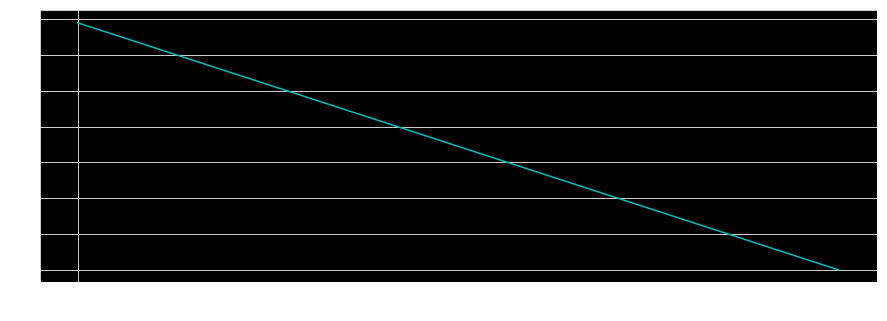

In [37]:
from urllib import request
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd
from tqdm import tqdm
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# stock_URL.csvの読み込み
url_list = pd.read_csv("page_URL.csv", index_col=0)
url_df = pd.DataFrame(url_list)
pages = {}

# ページを選択してそのページ内の企業urlを取得する

for page in tqdm(list(url_df.iloc[:,0]),desc='first'):
    u_page = page.split('=')[1]
    
    # pageを辞書に格納
    pages[u_page] = [page]
    
page_num = input("ページ数を入力:")   
page_s = pages[page_num]


# 入力したページのhtmlを取得
base_page = "".join(page_s)
html = request.urlopen(base_page)
soup = BeautifulSoup(html,"html.parser")
url = []

for t in tqdm(soup.find_all("a"),desc='second'):
    url.append(''.join(list(urljoin(base_page, t.get('href')))))
    
Table = pd.DataFrame(url)
# display(Table)

# 入力したページの企業urlテーブルを取得
Table = Table.iloc[range(8,128),0]

Table.reset_index(inplace=True, drop=True)
Table.to_csv('page_' + page_num + '.csv', header=True)


    
# データの欲しい企業番号を入力
C_num = input("stock_num:")
s_t_url = "https://kabuoji3.com/stock/" + C_num + "/"
print(s_t_url)

# 企業の株価テーブルを取得
stock_table = pd.read_html(s_t_url)
# print(stock_table)

len_t_list = len(stock_table)
# print(len_t_list)

df_sub = pd.DataFrame()
df_Table = pd.DataFrame()

for col in ["日付","始値","高値","安値","終値","出来高","終値調整"]:
    
    for l in range(0, len_t_list):
        
        df = pd.DataFrame(stock_table)
#         print(df)
        
        if l == 0:
            df_sub = stock_table[l][col]
        else:
            df_sub = df_sub.append(stock_table[l][col])
            
    df_con = df_sub.reset_index(drop=True)
    
    if col == ["日付"]:
        df_Table = df_con
    else:
        df_Table = pd.concat([df_Table, df_con], axis=1)
        
display(df_Table)
    
# 取得した株価テーブルを図にプロット
x = df_Table["日付"][-1::-1]
y = df_Table["終値"][-1::-1]
ma75 = pd.DataFrame.rolling(y, window=75, center=True).mean()
ma25 = pd.DataFrame.rolling(y, window=25, center=True).mean()

plt.figure(figsize=(15,5))
plt.plot(x, y, color='c')
plt.plot(x, ma75, color='g', linewidth=1.7, label='ma75')
plt.plot(x, ma25, color='tomato', linewidth=1.7, label='ma25')
ticks = 40
plt.xticks(x[::ticks], rotation=15)
plt.style.use('dark_background')
plt.grid()
plt.show()
    

In [6]:
### from urllib import request
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd
from tqdm import tqdm
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import re
from urllib import request
%matplotlib inline

# stock_URL.csvの読み込み
url_list = pd.read_csv("page_URL.csv", index_col=0)
url_df = pd.DataFrame(url_list)
pages = {}

# ページを選択してそのページ内の企業urlを取得する
for page in tqdm(list(url_df.iloc[:,0]),desc='first'):
    u_page = page.split('=')[1]
    
    # pageを辞書に格納
    pages[u_page] = [page]
    
page_num = input("ページ数を入力:")   
page_s = pages[page_num]


# 入力したページのhtmlを取得
base_page = "".join(page_s)
html = request.urlopen(base_page)
soup = BeautifulSoup(html,"html.parser")
url = []

for t in tqdm(soup.find_all("a"),desc='second'):
    url.append(''.join(list(urljoin(base_page, t.get('href')))))
    
Table = pd.DataFrame(url)
# display(Table)

# 入力したページの企業urlテーブルを取得
Table = Table.iloc[range(8,128),0]

Table.reset_index(inplace=True, drop=True)
Table.to_csv('page_' + page_num + '.csv', header=True)

    
# データの欲しい企業番号を入力してurlを取得
C_num = input("stock_num:")
st_url = "https://kabuoji3.com/stock/" + C_num + "/"
print(st_url)

# 企業の株価テーブルを取得
html = request.urlopen(st_url)
soup = BeautifulSoup(html, 'html.parser')
i = soup.find_all('tr')
prs = [e.text for e in i]
j = str(prs).split('\\n')
ks = ' '.join(j).split(',')
print(pd.Series(ks))

first: 100%|██████████| 33/33 [00:00<00:00, 133602.35it/s]


ページ数を入力: 1


second: 100%|██████████| 175/175 [00:00<00:00, 66461.72it/s]


stock_num: 1301


https://kabuoji3.com/stock/1301/
0                         [' 日付 始値 高値 安値 終値 出来高 終値調整 '
1        ' 2019-04-17 2853 2853 2784 2800 43100 2800 '
2        ' 2019-04-16 2850 2876 2836 2854 22200 2854 '
3        ' 2019-04-15 2820 2867 2820 2861 35200 2861 '
4        ' 2019-04-12 2790 2816 2773 2816 15300 2816 '
5        ' 2019-04-11 2821 2830 2789 2790 20500 2790 '
6        ' 2019-04-10 2751 2845 2732 2832 59200 2832 '
7        ' 2019-04-09 2759 2768 2748 2768 24700 2768 '
8        ' 2019-04-08 2773 2778 2760 2778 19400 2778 '
9        ' 2019-04-05 2763 2789 2759 2771 23400 2771 '
10       ' 2019-04-04 2793 2801 2766 2770 32700 2770 '
11       ' 2019-04-03 2835 2836 2773 2789 57200 2789 '
12       ' 2019-04-02 2878 2878 2830 2830 25000 2830 '
13       ' 2019-04-01 2839 2890 2839 2861 32500 2861 '
14       ' 2019-03-29 2828 2848 2820 2836 23400 2836 '
15       ' 2019-03-28 2927 2927 2796 2796 87500 2796 '
16       ' 2019-03-27 2860 2950 2850 2938 82700 2938 '
17      ' 2019-03-26 3045 3060 3

              始値    高値    安値    終値    出来高  終値調整
日付                                             
2019-04-17  2853  2853  2784  2800  43100  2800
2019-04-16  2850  2876  2836  2854  22200  2854
2019-04-15  2820  2867  2820  2861  35200  2861


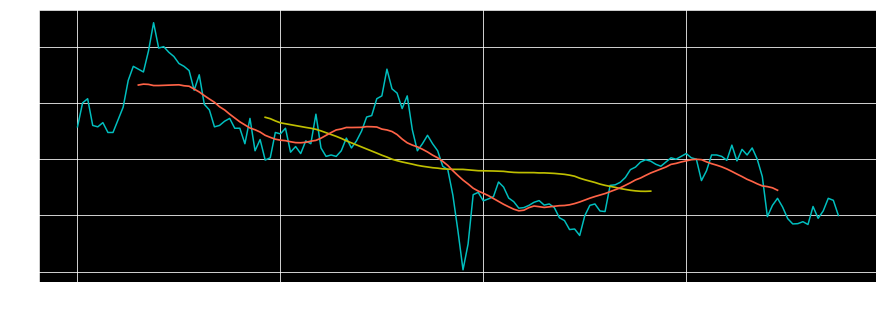

In [49]:
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd
from tqdm import tqdm
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import re
from urllib import request
%matplotlib inline

url = 'https://kabuoji3.com/stock/1301/'
tables = pd.read_html(url, flavor='bs4',index_col=0)
print(tables[0][0:3])
dfs = pd.DataFrame(tables[0])

x = dfs.index[-1::-1]
y = dfs.loc[:, ['終値']][-1::-1]
sma75 = pd.DataFrame.rolling(y, window=75, center=True).mean()
sma25 = pd.DataFrame.rolling(y, window=25, center=True).mean()

plt.figure(figsize=(15,5))
plt.plot(x, y, color='c')
plt.plot(x, sma75, color='y', linewidth=1.7, label='ma75')
plt.plot(x, sma25, color='tomato', linewidth=1.7, label='ma25')
ticks = 40
plt.xticks(x[::ticks], rotation=15)
plt.style.use('dark_background')
plt.grid()
plt.show()


first: 100%|██████████| 33/33 [00:00<00:00, 216946.76it/s]


ページ数を入力: 32


second: 100%|██████████| 175/175 [00:00<00:00, 51487.32it/s]


stock_num: 9684


https://kabuoji3.com/stock/9684/
              始値    高値    安値    終値      出来高  終値調整
日付                                               
2019-04-17  3785  3805  3730  3790   822900  3790
2019-04-16  3645  3840  3635  3805  1431500  3805
2019-04-15  3600  3620  3520  3585   763400  3585


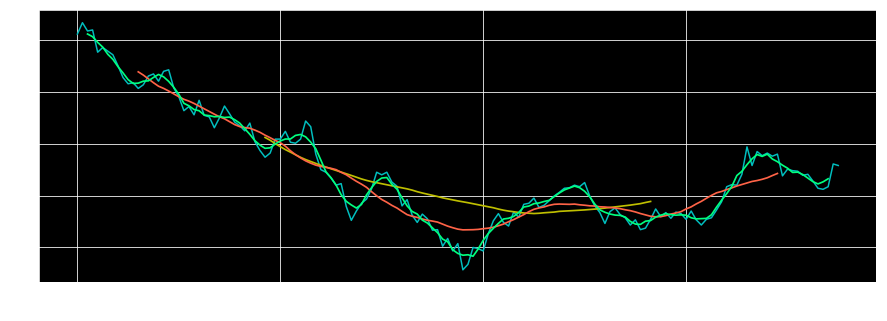

In [55]:
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd
from tqdm import tqdm
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import re
from urllib import request
%matplotlib inline


# stock_URL.csvの読み込み
url_list = pd.read_csv("page_URL.csv", index_col=0)
url_df = pd.DataFrame(url_list)
pages = {}

# ページを選択してそのページ内の企業urlを取得する
for page in tqdm(list(url_df.iloc[:,0]),desc='first'):
    u_page = page.split('=')[1]
    
    # pageを辞書に格納
    pages[u_page] = [page]
    
page_num = input("ページ数を入力:")   
page_s = pages[page_num]


# 入力したページのhtmlを取得
base_page = "".join(page_s)
html = request.urlopen(base_page)
soup = BeautifulSoup(html,"html.parser")
url = []

for t in tqdm(soup.find_all("a"),desc='second'):
    url.append(''.join(list(urljoin(base_page, t.get('href')))))
    
Table = pd.DataFrame(url)
# display(Table)

# 入力したページの企業urlテーブルを取得
Table = Table.iloc[range(8,128),0]

Table.reset_index(inplace=True, drop=True)
Table.to_csv('page_' + page_num + '.csv', header=True)

    
# データの欲しい企業番号を入力してurlを取得
C_num = input("stock_num:")
st_url = "https://kabuoji3.com/stock/" + C_num + "/"
print(st_url)



# url = 'https://kabuoji3.com/stock/1301/'
tables = pd.read_html(st_url, flavor='bs4',index_col=0)
print(tables[0][0:3])
dfs = pd.DataFrame(tables[0])

x = dfs.index[-1::-1]
y = dfs.loc[:, ['終値']][-1::-1]
sma75 = pd.DataFrame.rolling(y, window=75, center=True).mean()
sma25 = pd.DataFrame.rolling(y, window=25, center=True).mean()
sma5 = pd.DataFrame.rolling(y, window=5, center=True).mean()

plt.figure(figsize=(15,5))
plt.plot(x, y, color='c')
plt.plot(x, sma75, color='y', linewidth=1.7, label='ma75')
plt.plot(x, sma25, color='tomato', linewidth=1.7, label='ma25')
plt.plot(x, sma5, color='springgreen', linewidth=1.7, label='ma5')
ticks = 40
plt.xticks(x[::ticks], rotation=15)
plt.style.use('dark_background')
plt.grid()
plt.show()


first: 100%|██████████| 33/33 [00:00<00:00, 196329.12it/s]


ページ数を入力: 1


second: 100%|██████████| 175/175 [00:00<00:00, 67284.19it/s]


              始値    高値    安値    終値    出来高  終値調整
日付                                             
2019-04-18  2834  2834  2769  2780  23000  2780
2019-04-17  2853  2853  2784  2800  43100  2800
2019-04-16  2850  2876  2836  2854  22200  2854
2019-04-15  2820  2867  2820  2861  35200  2861
2019-04-12  2790  2816  2773  2816  15300  2816


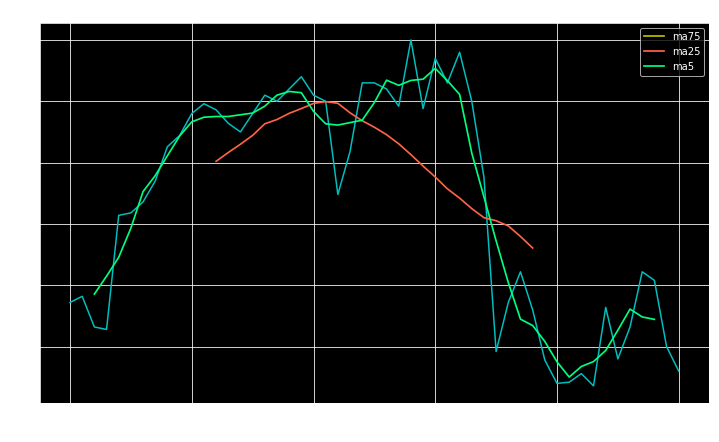

              始値    高値    安値    終値     出来高  終値調整
日付                                              
2019-04-18  1728  1728  1707  1709  101040  1709
2019-04-17  1724  1730  1722  1728  778220  1728
2019-04-16  1720  1729  1720  1723   99660  1723
2019-04-15  1723  1729  1721  1723  315400  1723
2019-04-12  1711  1711  1696  1701  229420  1701


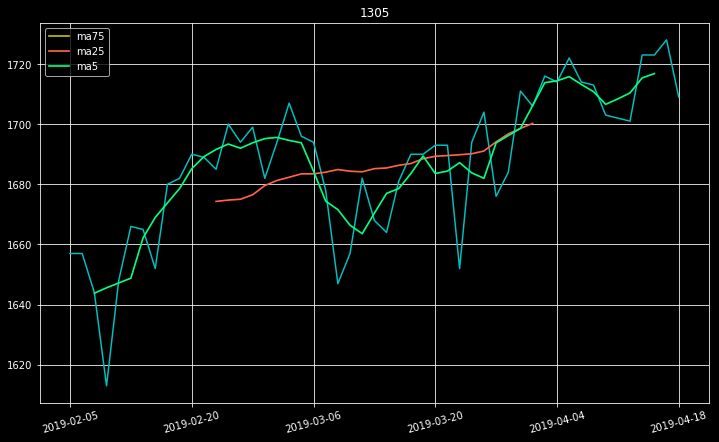

              始値    高値    安値    終値      出来高  終値調整
日付                                               
2019-04-18  1705  1706  1683  1687  1855320  1687
2019-04-17  1703  1708  1698  1705  3890910  1705
2019-04-16  1696  1707  1696  1699  3250090  1699
2019-04-15  1700  1706  1697  1700  2140600  1700
2019-04-12  1686  1687  1673  1678  1352390  1678


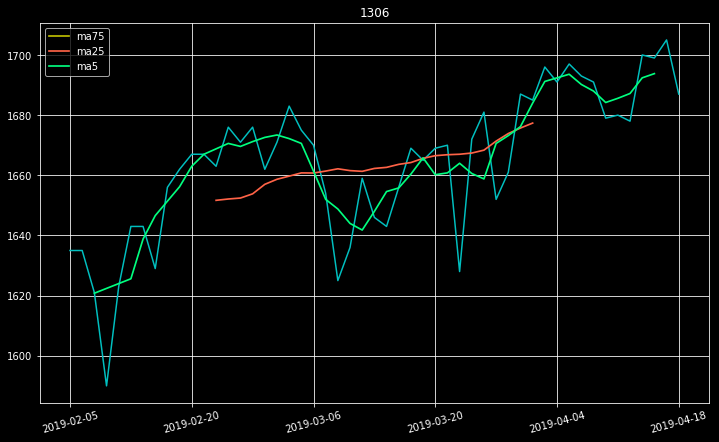

              始値    高値    安値    終値     出来高  終値調整
日付                                              
2019-04-18  1687  1687  1666  1670   86600  1670
2019-04-17  1683  1689  1680  1687  270200  1687
2019-04-16  1678  1688  1678  1683  245000  1683
2019-04-15  1681  1688  1680  1684  186700  1684
2019-04-12  1668  1668  1656  1661  102100  1661


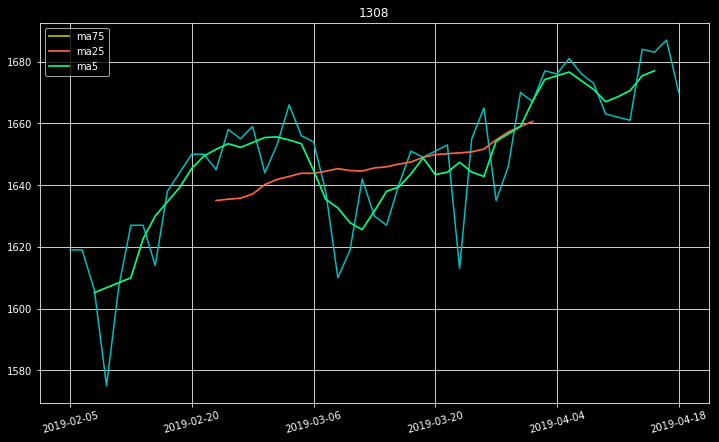

               始値     高値     安値     終値   出来高   終値調整
日付                                                 
2019-04-18  33700  33750  33500  33650   296  33650
2019-04-17  33750  33950  33600  33750   534  33750
2019-04-16  32900  33450  32900  33450   674  33450
2019-04-15  32850  33500  32850  33200  1106  33200
2019-04-12  32450  32750  32450  32550   281  32550


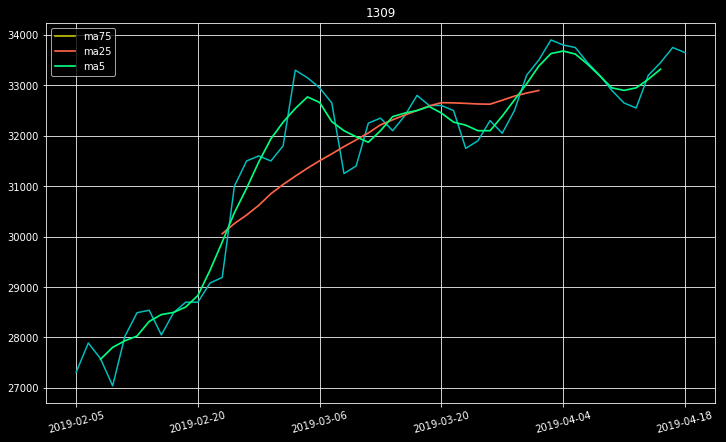

             始値   高値   安値   終値  出来高  終値調整
日付                                       
2019-04-18  742  742  737  737  210   737
2019-04-17  739  741  739  740  470   740
2019-04-16  736  738  736  738   20   738
2019-04-15  733  740  733  736  520   736
2019-04-12  727  727  727  727   10   727


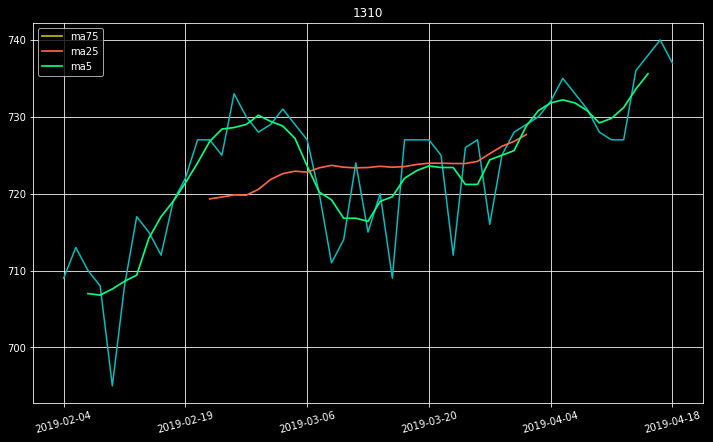

             始値   高値   安値   終値   出来高  終値調整
日付                                        
2019-04-18  759  759  752  752  2350   752
2019-04-17  754  758  754  758   270   758
2019-04-16  753  756  752  753  4120   753
2019-04-15  743  753  743  753  3930   753
2019-04-12  740  742  740  742   120   742


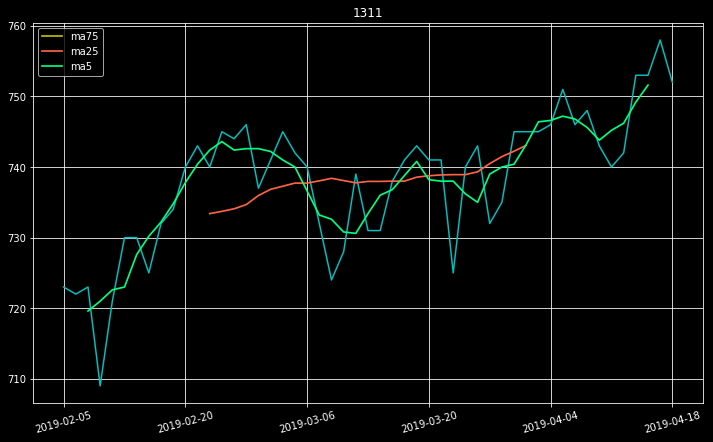

               始値     高値     安値     終値  出来高   終値調整
日付                                                
2019-04-18  20030  20030  20030  20030    4  20030
2019-04-17  19830  19830  19830  19830   20  19830
2019-04-16  20000  20000  19860  19860    3  19860
2019-04-12  19900  19900  19900  19900    2  19900
2019-04-11  19860  19860  19750  19750   17  19750


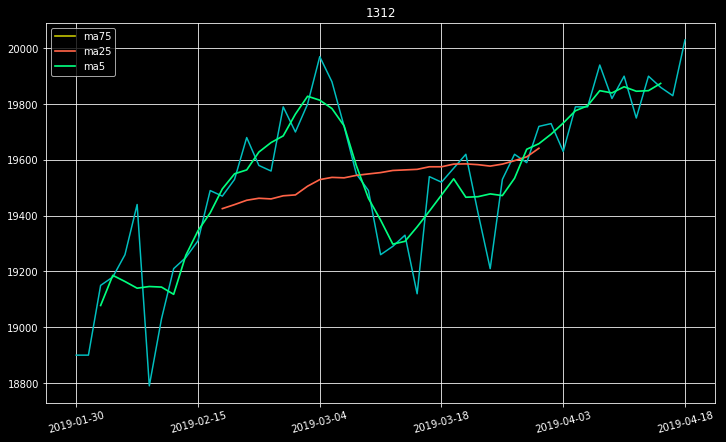

              始値    高値    安値    終値  出来高  終値調整
日付                                           
2019-04-18  2900  2920  2870  2920   50  2920
2019-04-17  2980  3000  2900  2900  150  2900
2019-04-16  3070  3070  2980  2980   40  2980
2019-04-15  2780  2900  2780  2900  860  2900
2019-04-10  2875  2875  2870  2870   30  2870


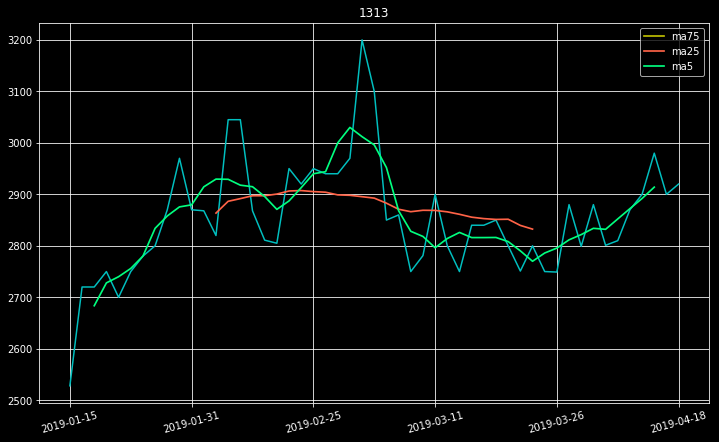

             始値   高値   安値   終値    出来高  終値調整
日付                                         
2019-04-18  322  322  320  320  10000   320
2019-04-17  320  320  320  320   1000   320
2019-04-16  322  322  320  320  13000   320
2019-04-15  319  319  319  319   6000   319
2019-04-12  314  318  314  318   3000   318


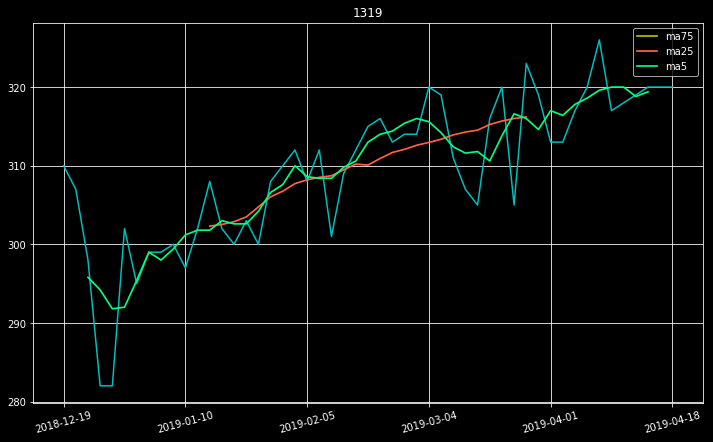

               始値     高値     安値     終値     出来高   終値調整
日付                                                   
2019-04-18  23100  23120  22880  22900   36978  22900
2019-04-17  23090  23170  23020  23110   50684  23110
2019-04-16  22950  23080  22950  23050  104557  23050
2019-04-15  22910  23020  22910  23000  240606  23000
2019-04-12  22630  22680  22500  22680   31078  22680


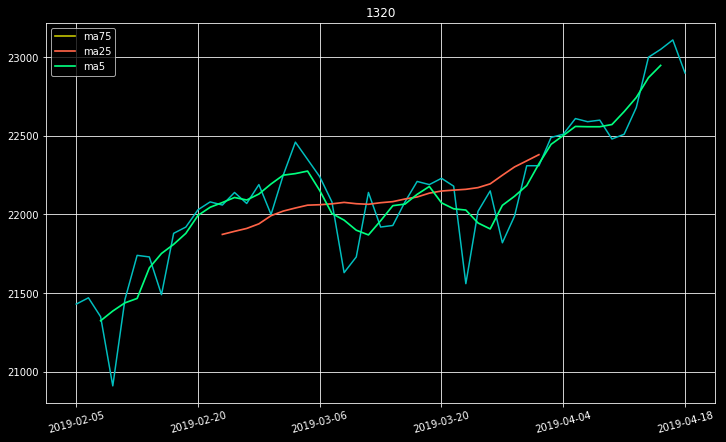

               始値     高値     安値     終値     出来高   終値調整
日付                                                   
2019-04-18  23130  23150  22910  22930  187198  22930
2019-04-17  23110  23200  23030  23140  318681  23140
2019-04-16  23000  23110  22980  23070  271717  23070
2019-04-15  22940  23060  22940  23030  849297  23030
2019-04-12  22680  22720  22540  22710  170390  22710


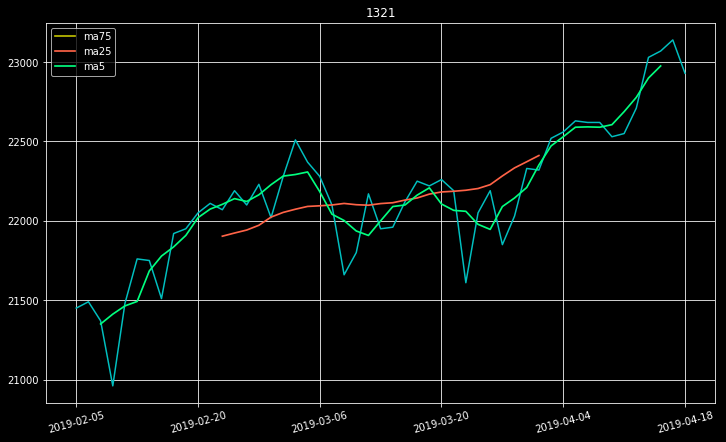

              始値    高値    安値    終値   出来高  終値調整
日付                                            
2019-04-18  5340  5370  5200  5300  1120  5300
2019-04-17  5350  5400  5330  5390  1010  5390
2019-04-16  5310  5400  5310  5340   560  5340
2019-04-15  5240  5350  5240  5340   800  5340
2019-04-12  5230  5300  5220  5300    80  5300


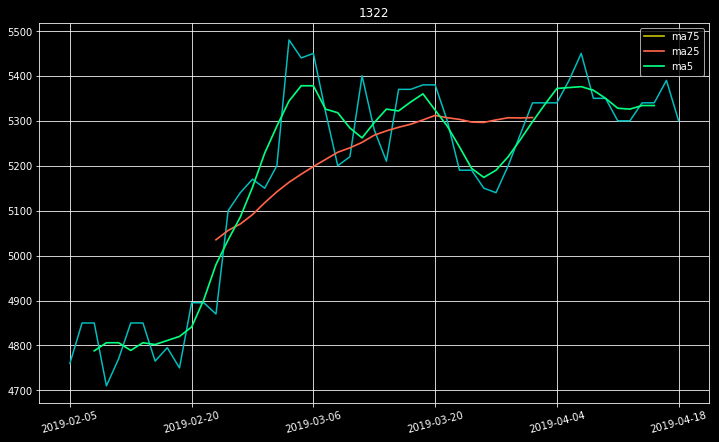

             始値   高値   安値   終値   出来高  終値調整
日付                                        
2019-04-18  371  372  370  372  2200   372
2019-04-17  375  375  375  375   500   375
2019-04-16  366  373  366  373   600   373
2019-04-15  373  374  373  374   700   374
2019-04-12  366  366  366  366   100   366


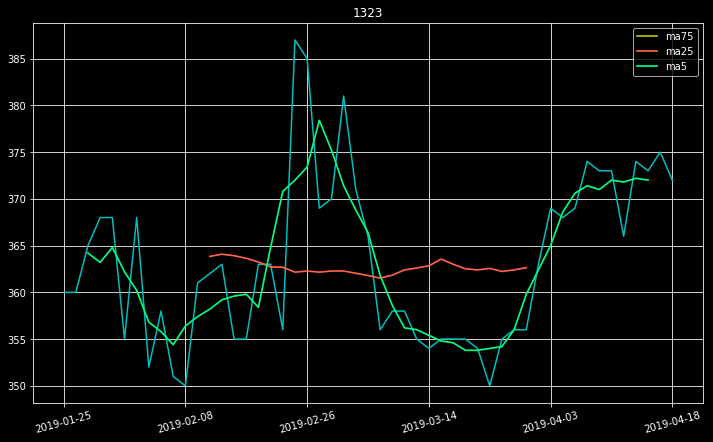

             始値   高値   安値   終値     出来高  終値調整
日付                                          
2019-04-18  137  138  136  137   70200   137
2019-04-17  135  138  135  137  114900   137
2019-04-16  135  135  134  135   73300   135
2019-04-15  134  135  134  135  235800   135
2019-04-12  133  134  133  133    8100   133


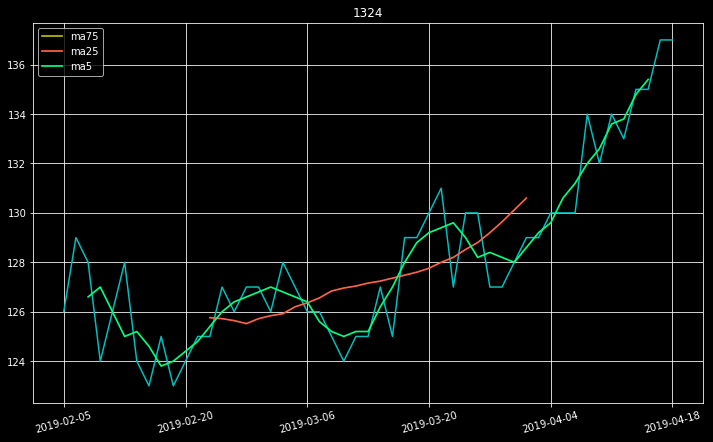

             始値   高値   安値   終値    出来高  終値調整
日付                                         
2019-04-18  209  209  207  207  17000   207
2019-04-17  212  213  211  211   8400   211
2019-04-16  212  212  210  211   8800   211
2019-04-15  210  212  209  212  14700   212
2019-04-12  212  213  211  211   6300   211


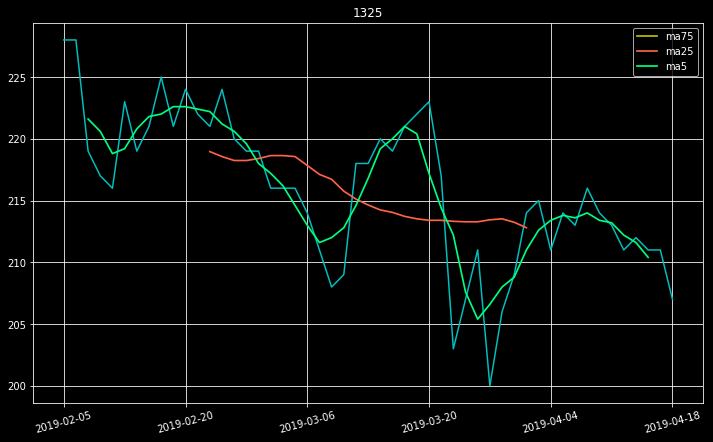

               始値     高値     安値     終値   出来高   終値調整
日付                                                 
2019-04-18  13490  13490  13440  13440  1894  13440
2019-04-17  13530  13530  13490  13530  1810  13530
2019-04-16  13600  13620  13570  13570   612  13570
2019-04-15  13670  13670  13600  13610  2469  13610
2019-04-12  13650  13660  13600  13650  4893  13650


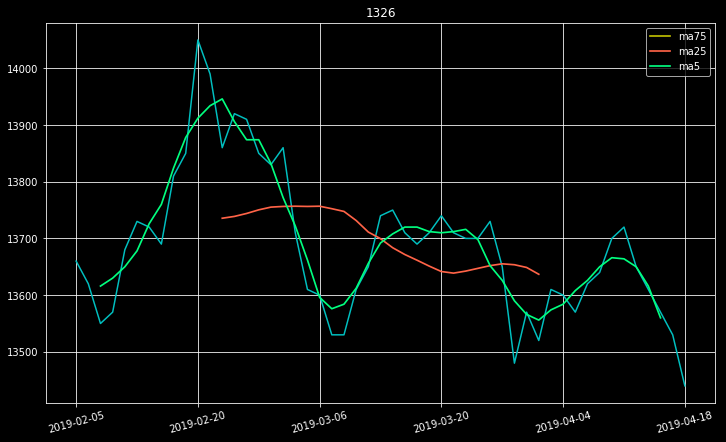

              始値    高値    安値    終値  出来高  終値調整
日付                                           
2019-04-18  3280  3280  3170  3170  270  3170
2019-04-16  3255  3315  3255  3280   71  3280
2019-04-15  3310  3320  3285  3320   64  3320
2019-04-12  3315  3340  3310  3310   68  3310
2019-04-11  3315  3320  3310  3310   11  3310


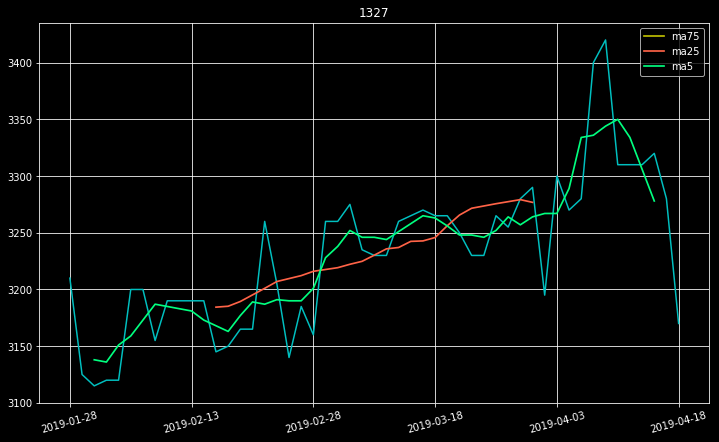

              始値    高値    安値    終値   出来高  終値調整
日付                                            
2019-04-18  3750  3750  3730  3740   490  3740
2019-04-17  3725  3750  3725  3750  1350  3750
2019-04-16  3715  3755  3715  3745  1190  3745
2019-04-15  3750  3770  3735  3750  3170  3750
2019-04-12  3800  3800  3765  3780   880  3780


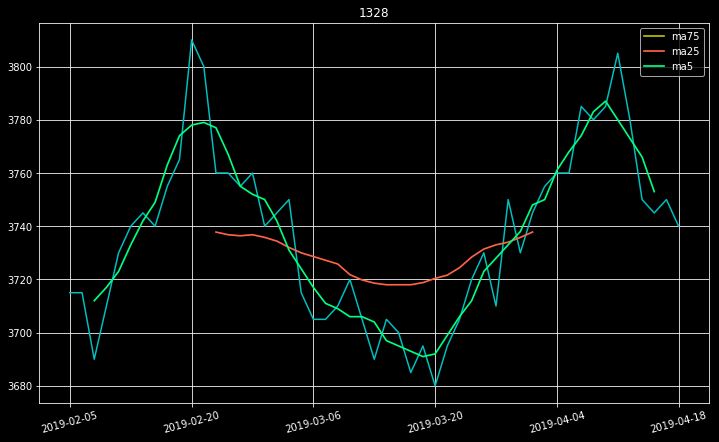

               始値     高値     安値     終値    出来高   終値調整
日付                                                  
2019-04-18  23050  23080  22830  22850   4615  22850
2019-04-17  23030  23120  22970  23060  15075  23060
2019-04-16  22920  23040  22910  23010  10689  23010
2019-04-15  22870  22990  22870  22940  13389  22940
2019-04-12  22580  22640  22460  22620   8008  22620


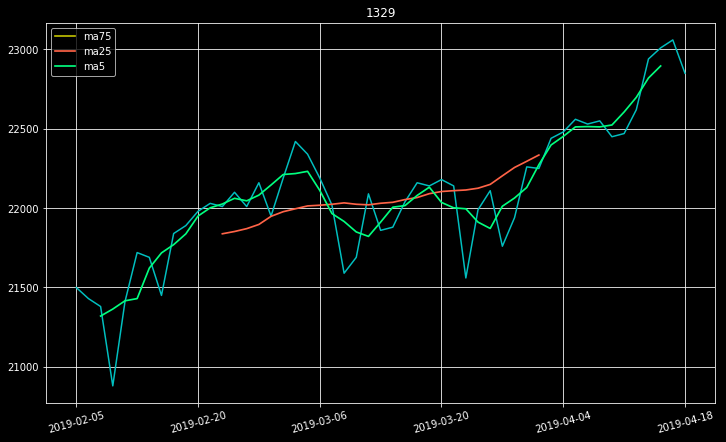

               始値     高値     安値     終値    出来高   終値調整
日付                                                  
2019-04-18  23220  23230  22980  23000  33940  23000
2019-04-17  23190  23280  23130  23220  53360  23220
2019-04-16  23060  23180  23060  23160  46400  23160
2019-04-15  23020  23130  23020  23090  84050  23090
2019-04-12  22730  22790  22610  22770  58850  22770


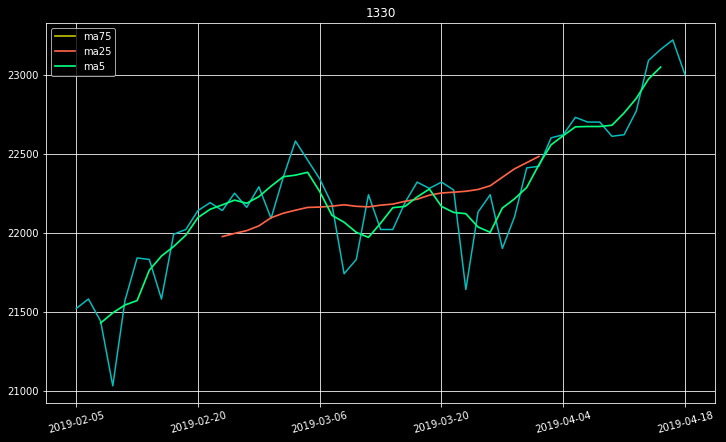

             始値   高値   安値   終値      出来高  終値調整
日付                                           
2019-04-18  759  760  744  747  2175800   747
2019-04-17  777  777  758  758  2885200   758
2019-04-16  781  787  774  778  3002800   778
2019-04-15  771  791  765  787  2910500   787
2019-04-12  772  773  757  764  2037400   764


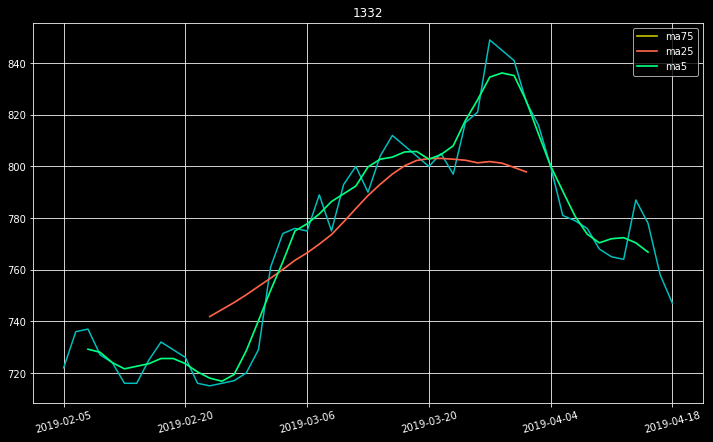

              始値    高値    安値    終値     出来高  終値調整
日付                                              
2019-04-18  3600  3610  3560  3565  178100  3565
2019-04-17  3660  3670  3615  3615  173400  3615
2019-04-16  3645  3690  3635  3675  123000  3675
2019-04-15  3670  3685  3645  3665  120900  3665
2019-04-12  3690  3690  3620  3635  186600  3635


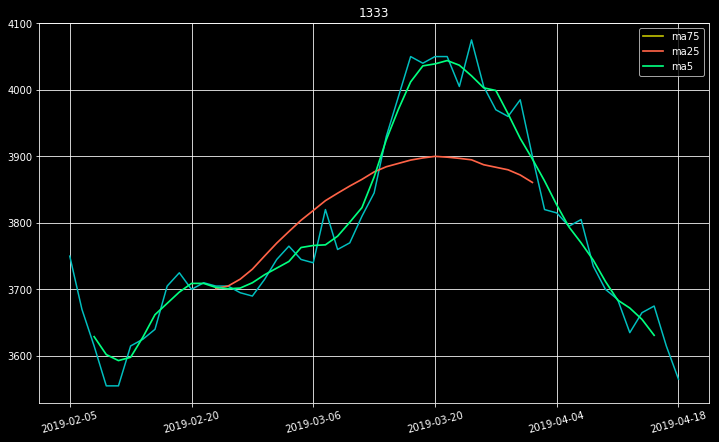

              始値    高値    安値    終値     出来高  終値調整
日付                                              
2019-04-18  2000  2016  2000  2012  224650  2012
2019-04-17  2014  2016  2002  2004  113190  2004
2019-04-16  2009  2015  2005  2015   75720  2015
2019-04-15  2011  2011  2001  2007  129990  2007
2019-04-12  2008  2008  1992  2006  163190  2006


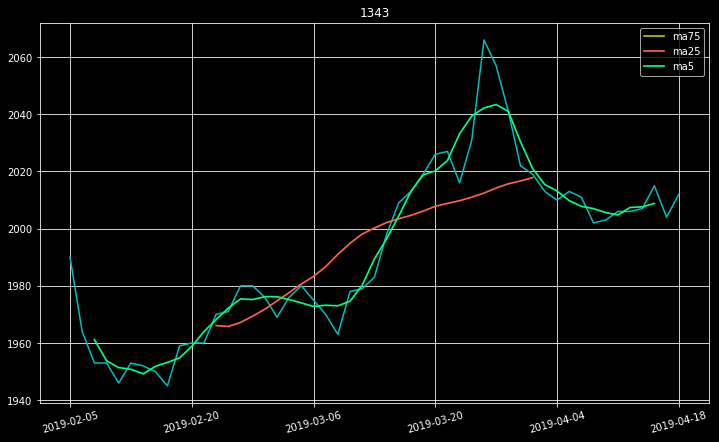

             始値   高値   安値   終値  出来高  終値調整
日付                                       
2019-04-18  723  723  719  719  190   719
2019-04-17  721  723  721  723  290   723
2019-04-16  715  721  714  721  580   721
2019-04-15  706  716  706  716  190   716
2019-04-12  709  709  709  709   70   709


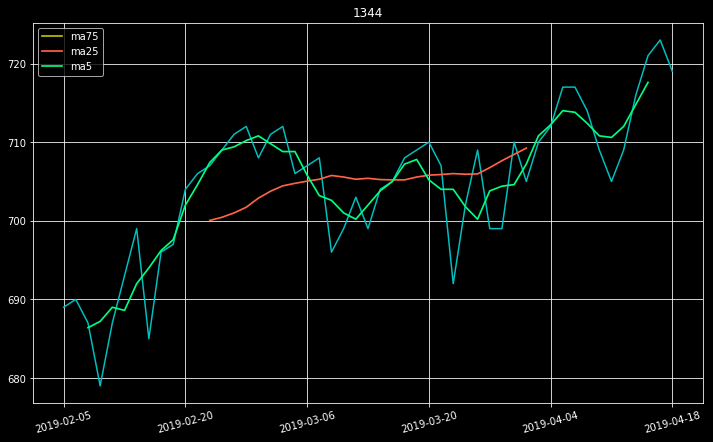

              始値    高値    安値    終値    出来高  終値調整
日付                                             
2019-04-18  1887  1904  1887  1902  30600  1902
2019-04-17  1900  1900  1888  1892   8000  1892
2019-04-16  1896  1899  1892  1895  10000  1895
2019-04-15  1898  1898  1888  1888  12200  1888
2019-04-12  1888  1888  1878  1888  34200  1888


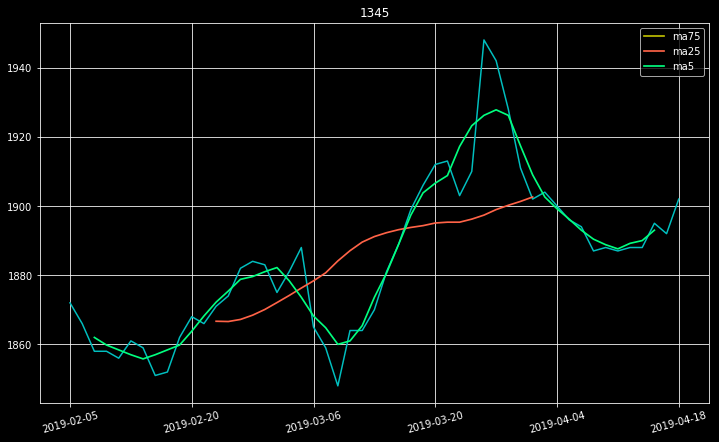

               始値     高値     安値     終値    出来高   終値調整
日付                                                  
2019-04-18  23040  23050  22810  22840  15070  22840
2019-04-17  23030  23100  22950  23040  24618  23040
2019-04-16  22900  23010  22890  22990  18581  22990
2019-04-15  22840  22960  22830  22930  52556  22930
2019-04-12  22560  22620  22430  22610  43951  22610


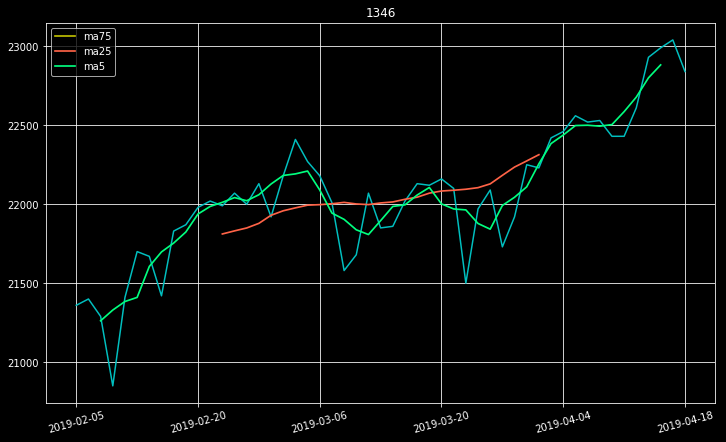

              始値    高値    安値    終値     出来高  終値調整
日付                                              
2019-04-18  1690  1692  1671  1673  117330  1673
2019-04-17  1688  1694  1685  1689   30100  1689
2019-04-16  1682  1692  1682  1685   97540  1685
2019-04-15  1685  1692  1684  1687   65670  1687
2019-04-12  1672  1672  1660  1665  110390  1665


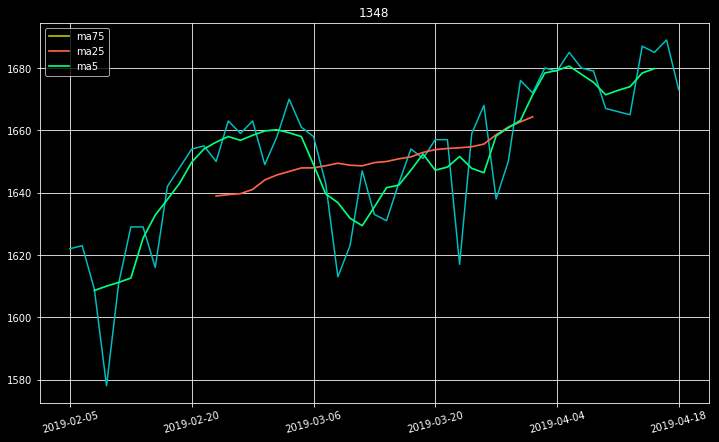

               始値     高値     安値     終値  出来高   終値調整
日付                                                
2019-04-18  12970  12990  12920  12990   26  12990
2019-04-17  12930  12980  12930  12980   35  12980
2019-04-16  12820  12900  12820  12900   20  12900
2019-04-15  12840  12900  12790  12790  108  12790
2019-04-12  12810  12820  12800  12810    8  12810


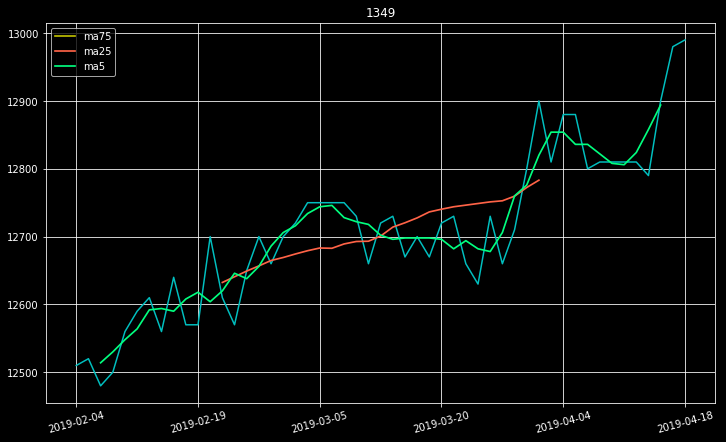

             始値   高値   安値   終値   出来高  終値調整
日付                                        
2019-04-18  857  857  845  852   600   852
2019-04-17  861  876  846  872  2200   872
2019-04-16  850  864  848  861  1000   861
2019-04-15  852  862  843  850  2500   850
2019-04-12  869  869  854  867   600   867


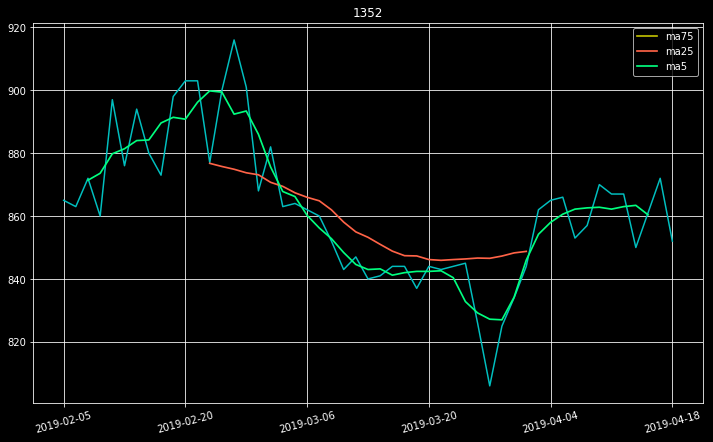

KeyboardInterrupt: 

In [99]:
### from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd
from tqdm import tqdm
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import re
from urllib import request
from openpyxl import Workbook
import openpyxl
%matplotlib inline


# stock_URL.csvの読み込み
url_list = pd.read_csv("page_URL.csv", index_col=0)
url_df = pd.DataFrame(url_list)
pages = {}

# ページを選択してそのページ内の企業urlを取得する
for page in tqdm(list(url_df.iloc[:,0]),desc='first'):
    u_page = page.split('=')[1]
    
    # pageを辞書に格納
    pages[u_page] = [page]
    
page_num = input("ページ数を入力:")   
page_s = pages[page_num]


# 入力したページのhtmlを取得
base_page = "".join(page_s)
html = request.urlopen(base_page)
soup = BeautifulSoup(html,"html.parser")
url = []

for t in tqdm(soup.find_all("a"),desc='second'):
    url.append(''.join(list(urljoin(base_page, t.get('href')))))
    
Table = pd.DataFrame(url)
# display(Table)


# 8〜128のfor文 
for Table_url in Table.iloc[range(8,128),0]:
#     print(Table)
    title = Table_url.split('/')[4]

    tables = pd.read_html(Table_url, flavor='bs4',index_col=0)
#     print(tables[0][0:3])
    dfs = pd.DataFrame(tables[0])
    print(dfs.head())

    x = dfs.index[50::-1]
#     x = x[50:]
    y = dfs.loc[:, ['終値']][50::-1]
#     y = y[50:]
    sma75 = pd.DataFrame.rolling(y, window=75, center=True).mean()
    sma25 = pd.DataFrame.rolling(y, window=25, center=True).mean()
    sma5 = pd.DataFrame.rolling(y, window=5, center=True).mean()

    plt.figure(figsize=(12,7))
    plt.plot(x, y, color='c')
    plt.plot(x, sma75, color='y', linewidth=1.7, label='ma75')
    plt.plot(x, sma25, color='tomato', linewidth=1.7, label='ma25')
    plt.plot(x, sma5, color='springgreen', linewidth=1.7, label='ma5')
    ticks = 10
    plt.xticks(x[::ticks], rotation=15)
    plt.title(title)
    plt.style.use('dark_background')
    plt.grid()
    plt.legend()
    plt.show()


first: 100%|██████████| 33/33 [00:00<00:00, 196329.12it/s]


ページ数を入力: 1


second: 100%|██████████| 175/175 [00:00<00:00, 67284.19it/s]


              始値    高値    安値    終値    出来高  終値調整
日付                                             
2019-04-18  2834  2834  2769  2780  23000  2780
2019-04-17  2853  2853  2784  2800  43100  2800
2019-04-16  2850  2876  2836  2854  22200  2854
2019-04-15  2820  2867  2820  2861  35200  2861
2019-04-12  2790  2816  2773  2816  15300  2816


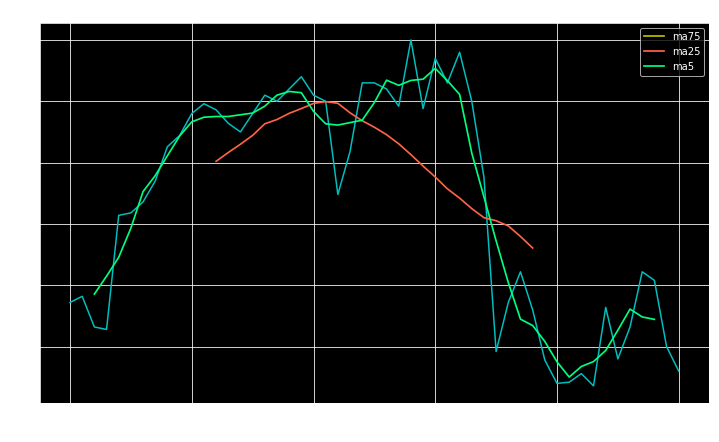

              始値    高値    安値    終値     出来高  終値調整
日付                                              
2019-04-18  1728  1728  1707  1709  101040  1709
2019-04-17  1724  1730  1722  1728  778220  1728
2019-04-16  1720  1729  1720  1723   99660  1723
2019-04-15  1723  1729  1721  1723  315400  1723
2019-04-12  1711  1711  1696  1701  229420  1701


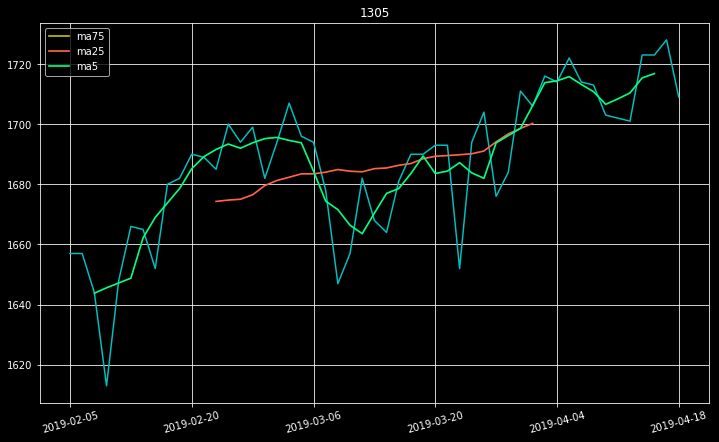

              始値    高値    安値    終値      出来高  終値調整
日付                                               
2019-04-18  1705  1706  1683  1687  1855320  1687
2019-04-17  1703  1708  1698  1705  3890910  1705
2019-04-16  1696  1707  1696  1699  3250090  1699
2019-04-15  1700  1706  1697  1700  2140600  1700
2019-04-12  1686  1687  1673  1678  1352390  1678


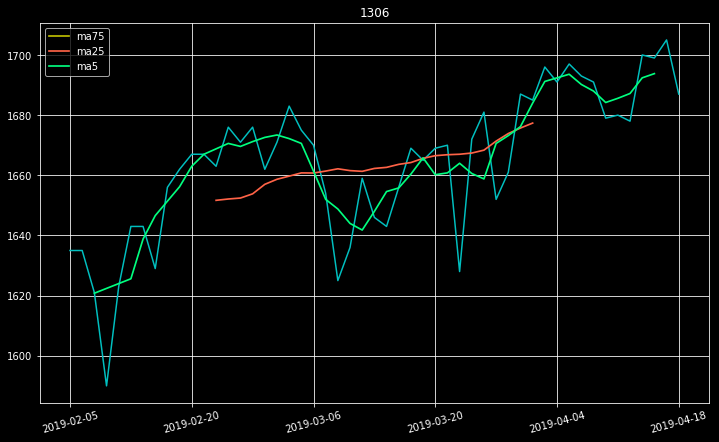

              始値    高値    安値    終値     出来高  終値調整
日付                                              
2019-04-18  1687  1687  1666  1670   86600  1670
2019-04-17  1683  1689  1680  1687  270200  1687
2019-04-16  1678  1688  1678  1683  245000  1683
2019-04-15  1681  1688  1680  1684  186700  1684
2019-04-12  1668  1668  1656  1661  102100  1661


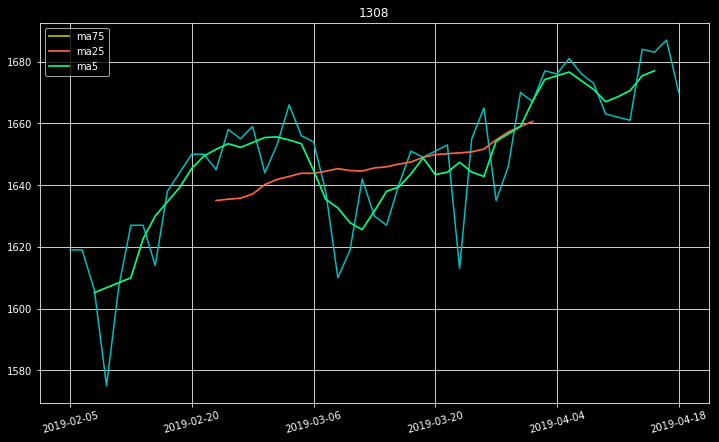

               始値     高値     安値     終値   出来高   終値調整
日付                                                 
2019-04-18  33700  33750  33500  33650   296  33650
2019-04-17  33750  33950  33600  33750   534  33750
2019-04-16  32900  33450  32900  33450   674  33450
2019-04-15  32850  33500  32850  33200  1106  33200
2019-04-12  32450  32750  32450  32550   281  32550


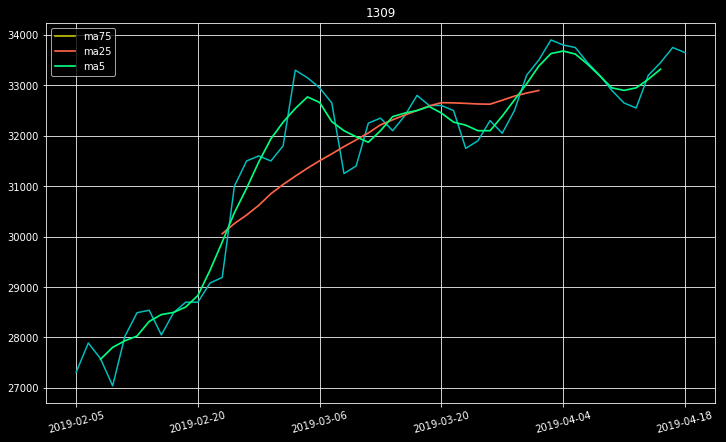

             始値   高値   安値   終値  出来高  終値調整
日付                                       
2019-04-18  742  742  737  737  210   737
2019-04-17  739  741  739  740  470   740
2019-04-16  736  738  736  738   20   738
2019-04-15  733  740  733  736  520   736
2019-04-12  727  727  727  727   10   727


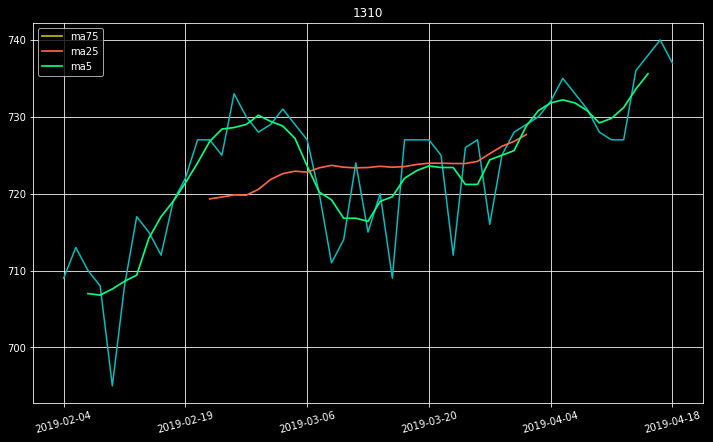

             始値   高値   安値   終値   出来高  終値調整
日付                                        
2019-04-18  759  759  752  752  2350   752
2019-04-17  754  758  754  758   270   758
2019-04-16  753  756  752  753  4120   753
2019-04-15  743  753  743  753  3930   753
2019-04-12  740  742  740  742   120   742


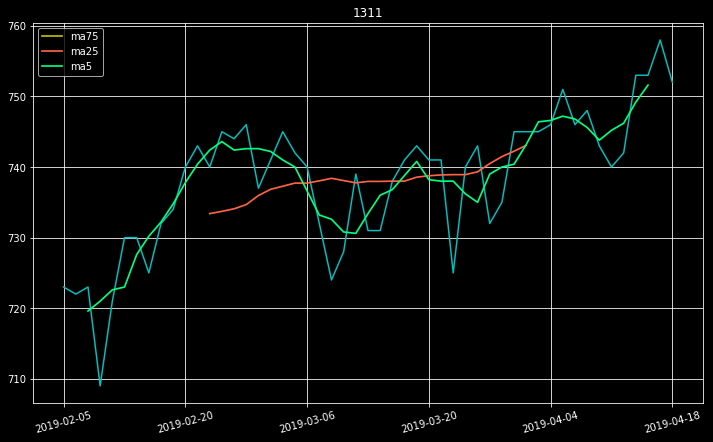

               始値     高値     安値     終値  出来高   終値調整
日付                                                
2019-04-18  20030  20030  20030  20030    4  20030
2019-04-17  19830  19830  19830  19830   20  19830
2019-04-16  20000  20000  19860  19860    3  19860
2019-04-12  19900  19900  19900  19900    2  19900
2019-04-11  19860  19860  19750  19750   17  19750


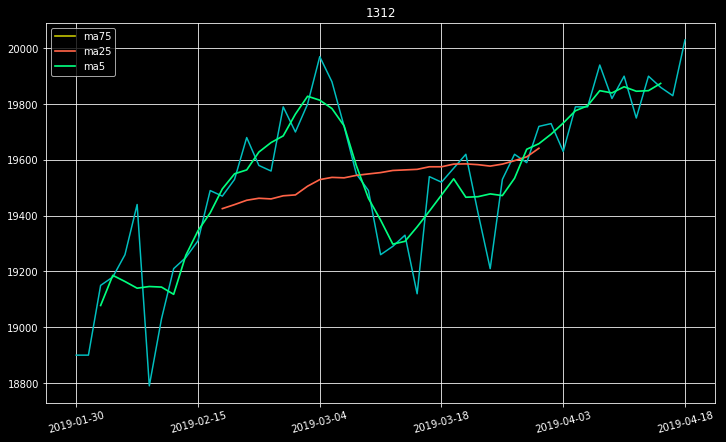

              始値    高値    安値    終値  出来高  終値調整
日付                                           
2019-04-18  2900  2920  2870  2920   50  2920
2019-04-17  2980  3000  2900  2900  150  2900
2019-04-16  3070  3070  2980  2980   40  2980
2019-04-15  2780  2900  2780  2900  860  2900
2019-04-10  2875  2875  2870  2870   30  2870


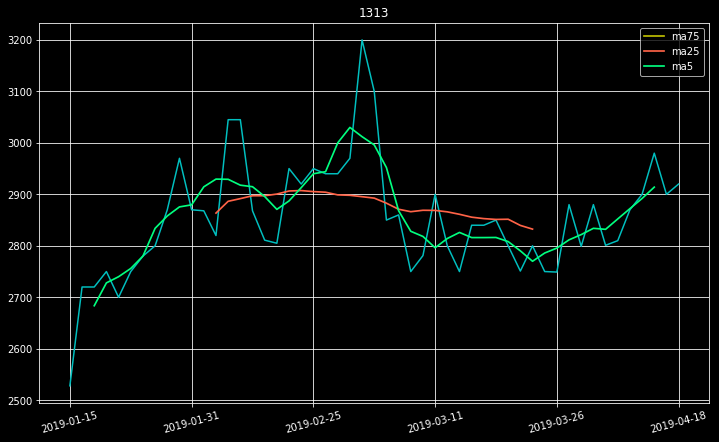

             始値   高値   安値   終値    出来高  終値調整
日付                                         
2019-04-18  322  322  320  320  10000   320
2019-04-17  320  320  320  320   1000   320
2019-04-16  322  322  320  320  13000   320
2019-04-15  319  319  319  319   6000   319
2019-04-12  314  318  314  318   3000   318


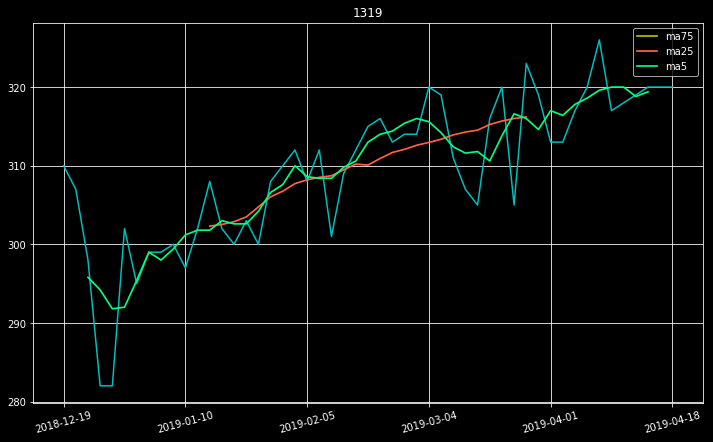

               始値     高値     安値     終値     出来高   終値調整
日付                                                   
2019-04-18  23100  23120  22880  22900   36978  22900
2019-04-17  23090  23170  23020  23110   50684  23110
2019-04-16  22950  23080  22950  23050  104557  23050
2019-04-15  22910  23020  22910  23000  240606  23000
2019-04-12  22630  22680  22500  22680   31078  22680


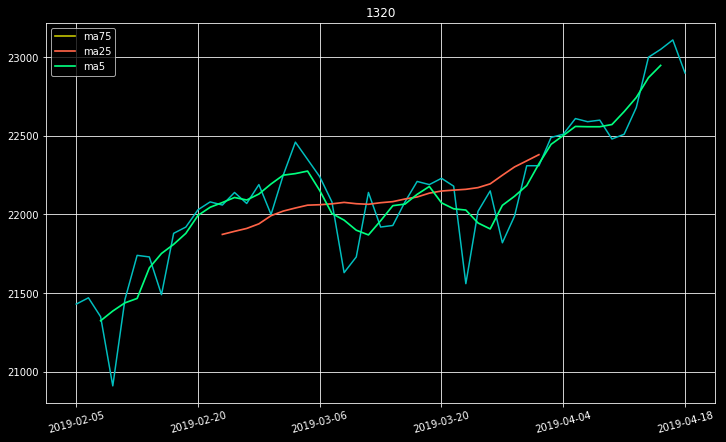

               始値     高値     安値     終値     出来高   終値調整
日付                                                   
2019-04-18  23130  23150  22910  22930  187198  22930
2019-04-17  23110  23200  23030  23140  318681  23140
2019-04-16  23000  23110  22980  23070  271717  23070
2019-04-15  22940  23060  22940  23030  849297  23030
2019-04-12  22680  22720  22540  22710  170390  22710


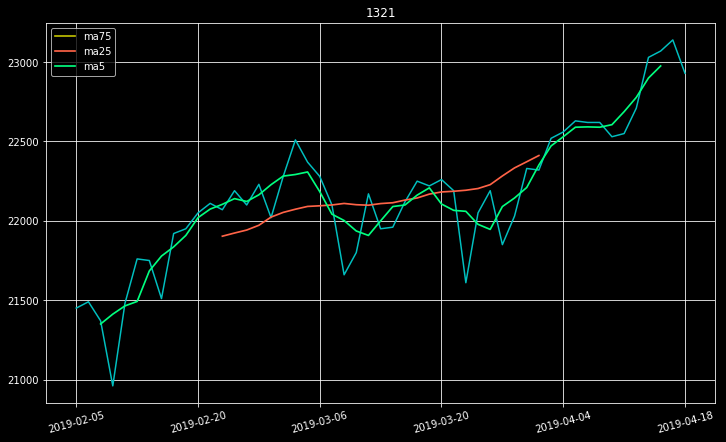

              始値    高値    安値    終値   出来高  終値調整
日付                                            
2019-04-18  5340  5370  5200  5300  1120  5300
2019-04-17  5350  5400  5330  5390  1010  5390
2019-04-16  5310  5400  5310  5340   560  5340
2019-04-15  5240  5350  5240  5340   800  5340
2019-04-12  5230  5300  5220  5300    80  5300


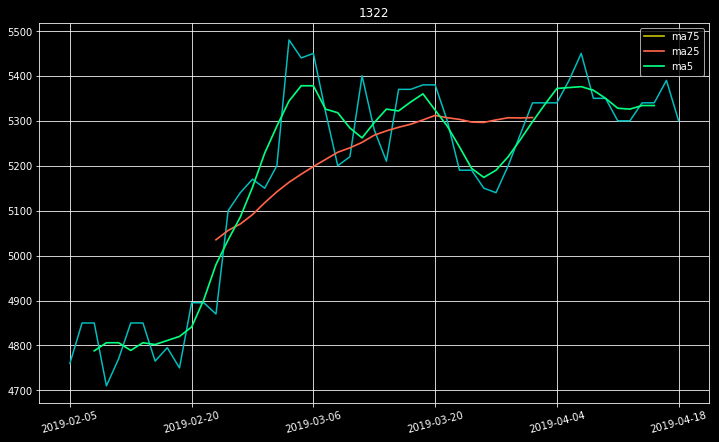

             始値   高値   安値   終値   出来高  終値調整
日付                                        
2019-04-18  371  372  370  372  2200   372
2019-04-17  375  375  375  375   500   375
2019-04-16  366  373  366  373   600   373
2019-04-15  373  374  373  374   700   374
2019-04-12  366  366  366  366   100   366


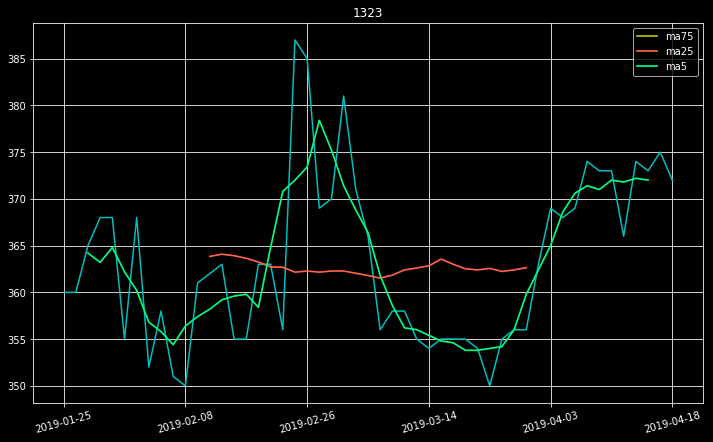

             始値   高値   安値   終値     出来高  終値調整
日付                                          
2019-04-18  137  138  136  137   70200   137
2019-04-17  135  138  135  137  114900   137
2019-04-16  135  135  134  135   73300   135
2019-04-15  134  135  134  135  235800   135
2019-04-12  133  134  133  133    8100   133


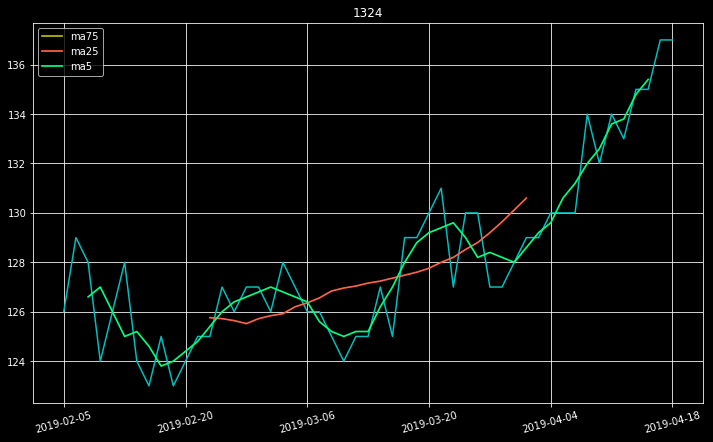

             始値   高値   安値   終値    出来高  終値調整
日付                                         
2019-04-18  209  209  207  207  17000   207
2019-04-17  212  213  211  211   8400   211
2019-04-16  212  212  210  211   8800   211
2019-04-15  210  212  209  212  14700   212
2019-04-12  212  213  211  211   6300   211


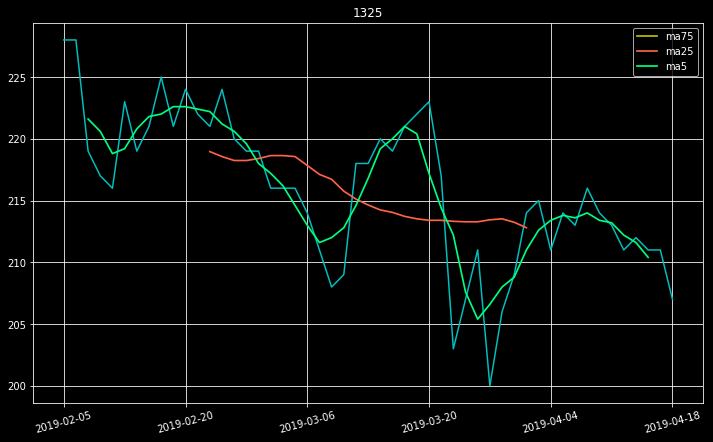

               始値     高値     安値     終値   出来高   終値調整
日付                                                 
2019-04-18  13490  13490  13440  13440  1894  13440
2019-04-17  13530  13530  13490  13530  1810  13530
2019-04-16  13600  13620  13570  13570   612  13570
2019-04-15  13670  13670  13600  13610  2469  13610
2019-04-12  13650  13660  13600  13650  4893  13650


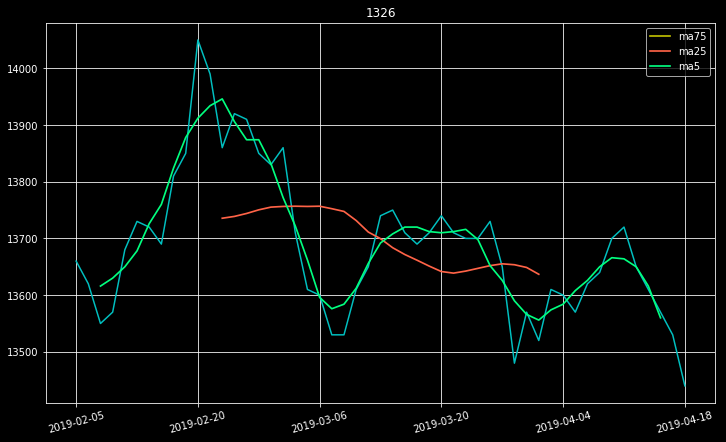

              始値    高値    安値    終値  出来高  終値調整
日付                                           
2019-04-18  3280  3280  3170  3170  270  3170
2019-04-16  3255  3315  3255  3280   71  3280
2019-04-15  3310  3320  3285  3320   64  3320
2019-04-12  3315  3340  3310  3310   68  3310
2019-04-11  3315  3320  3310  3310   11  3310


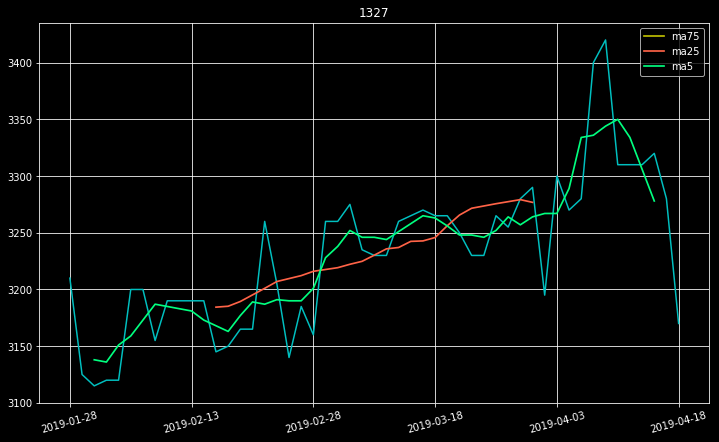

              始値    高値    安値    終値   出来高  終値調整
日付                                            
2019-04-18  3750  3750  3730  3740   490  3740
2019-04-17  3725  3750  3725  3750  1350  3750
2019-04-16  3715  3755  3715  3745  1190  3745
2019-04-15  3750  3770  3735  3750  3170  3750
2019-04-12  3800  3800  3765  3780   880  3780


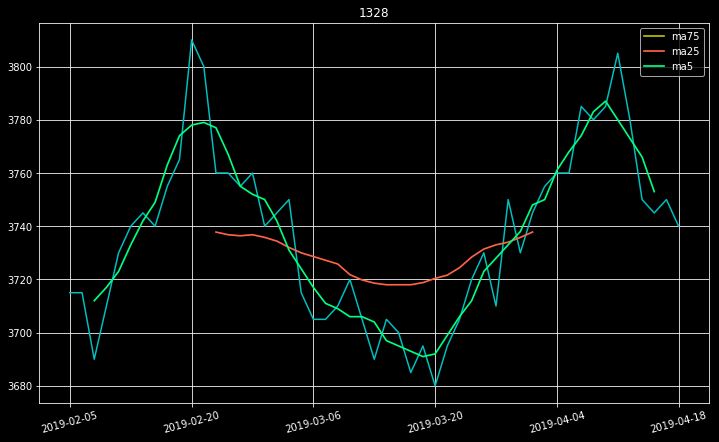

               始値     高値     安値     終値    出来高   終値調整
日付                                                  
2019-04-18  23050  23080  22830  22850   4615  22850
2019-04-17  23030  23120  22970  23060  15075  23060
2019-04-16  22920  23040  22910  23010  10689  23010
2019-04-15  22870  22990  22870  22940  13389  22940
2019-04-12  22580  22640  22460  22620   8008  22620


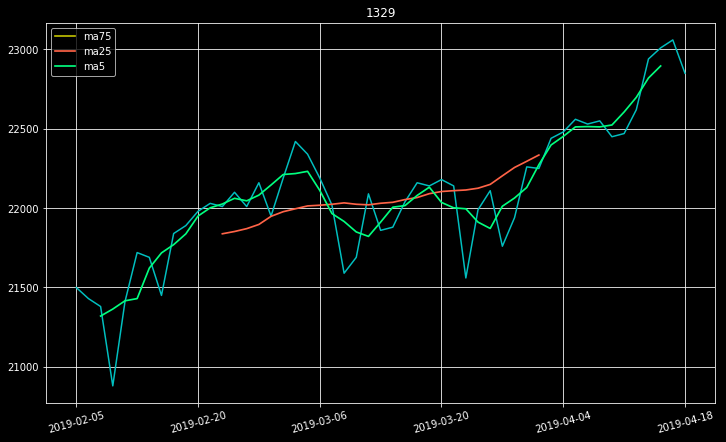

               始値     高値     安値     終値    出来高   終値調整
日付                                                  
2019-04-18  23220  23230  22980  23000  33940  23000
2019-04-17  23190  23280  23130  23220  53360  23220
2019-04-16  23060  23180  23060  23160  46400  23160
2019-04-15  23020  23130  23020  23090  84050  23090
2019-04-12  22730  22790  22610  22770  58850  22770


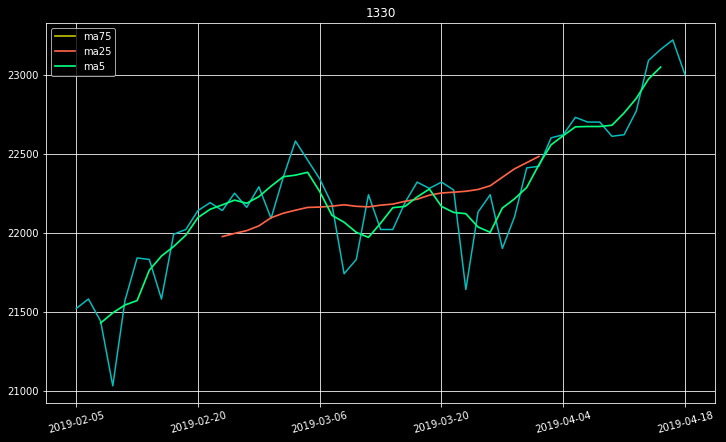

             始値   高値   安値   終値      出来高  終値調整
日付                                           
2019-04-18  759  760  744  747  2175800   747
2019-04-17  777  777  758  758  2885200   758
2019-04-16  781  787  774  778  3002800   778
2019-04-15  771  791  765  787  2910500   787
2019-04-12  772  773  757  764  2037400   764


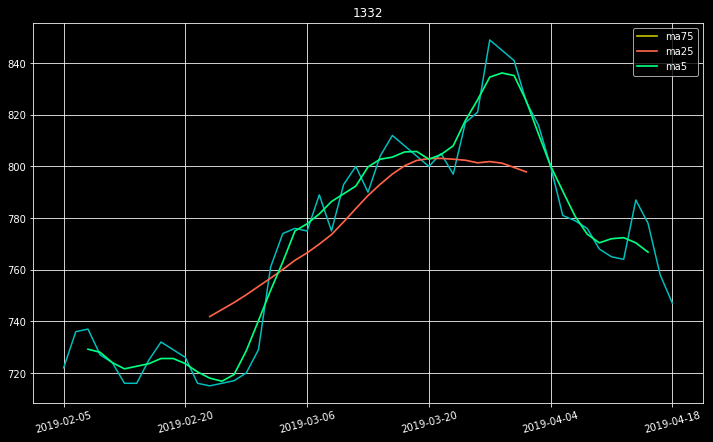

              始値    高値    安値    終値     出来高  終値調整
日付                                              
2019-04-18  3600  3610  3560  3565  178100  3565
2019-04-17  3660  3670  3615  3615  173400  3615
2019-04-16  3645  3690  3635  3675  123000  3675
2019-04-15  3670  3685  3645  3665  120900  3665
2019-04-12  3690  3690  3620  3635  186600  3635


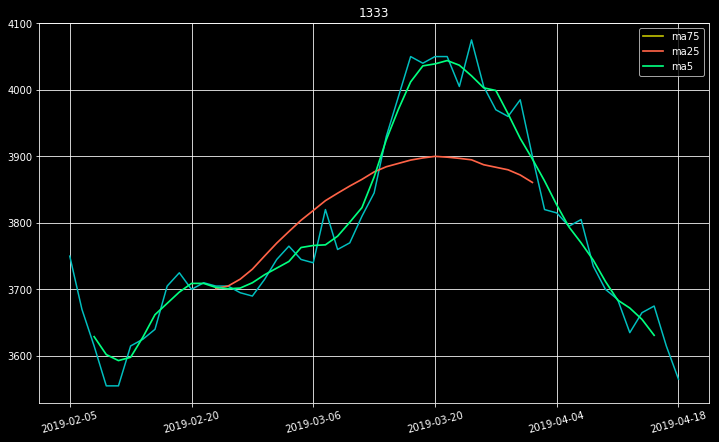

              始値    高値    安値    終値     出来高  終値調整
日付                                              
2019-04-18  2000  2016  2000  2012  224650  2012
2019-04-17  2014  2016  2002  2004  113190  2004
2019-04-16  2009  2015  2005  2015   75720  2015
2019-04-15  2011  2011  2001  2007  129990  2007
2019-04-12  2008  2008  1992  2006  163190  2006


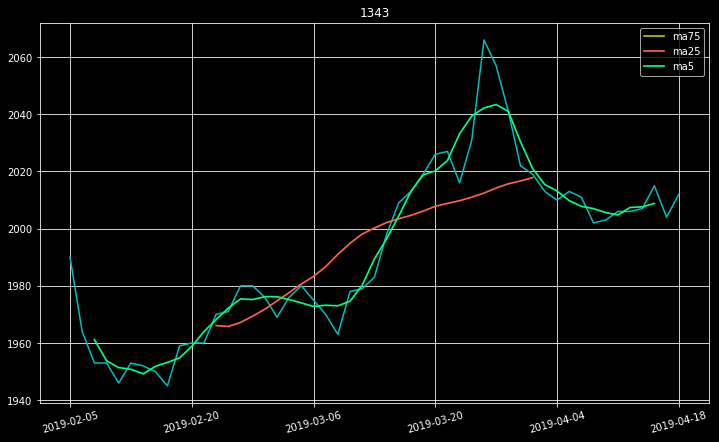

             始値   高値   安値   終値  出来高  終値調整
日付                                       
2019-04-18  723  723  719  719  190   719
2019-04-17  721  723  721  723  290   723
2019-04-16  715  721  714  721  580   721
2019-04-15  706  716  706  716  190   716
2019-04-12  709  709  709  709   70   709


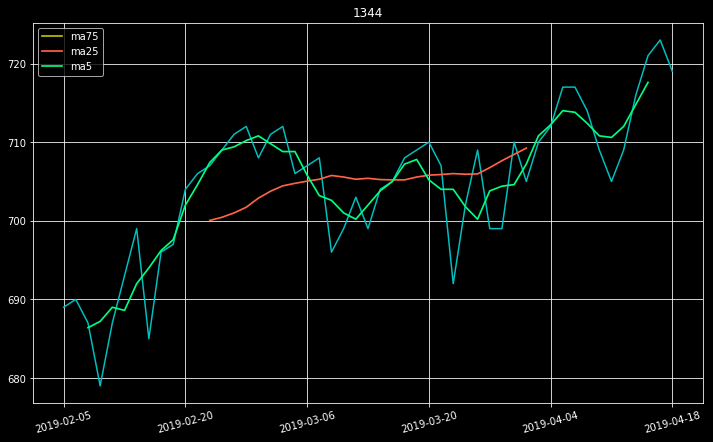

              始値    高値    安値    終値    出来高  終値調整
日付                                             
2019-04-18  1887  1904  1887  1902  30600  1902
2019-04-17  1900  1900  1888  1892   8000  1892
2019-04-16  1896  1899  1892  1895  10000  1895
2019-04-15  1898  1898  1888  1888  12200  1888
2019-04-12  1888  1888  1878  1888  34200  1888


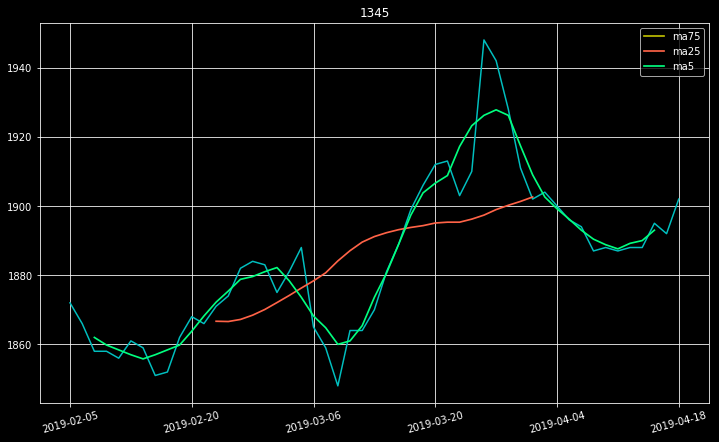

               始値     高値     安値     終値    出来高   終値調整
日付                                                  
2019-04-18  23040  23050  22810  22840  15070  22840
2019-04-17  23030  23100  22950  23040  24618  23040
2019-04-16  22900  23010  22890  22990  18581  22990
2019-04-15  22840  22960  22830  22930  52556  22930
2019-04-12  22560  22620  22430  22610  43951  22610


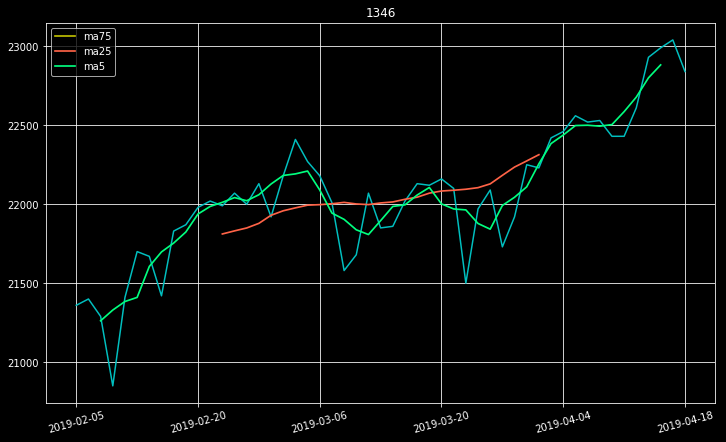

              始値    高値    安値    終値     出来高  終値調整
日付                                              
2019-04-18  1690  1692  1671  1673  117330  1673
2019-04-17  1688  1694  1685  1689   30100  1689
2019-04-16  1682  1692  1682  1685   97540  1685
2019-04-15  1685  1692  1684  1687   65670  1687
2019-04-12  1672  1672  1660  1665  110390  1665


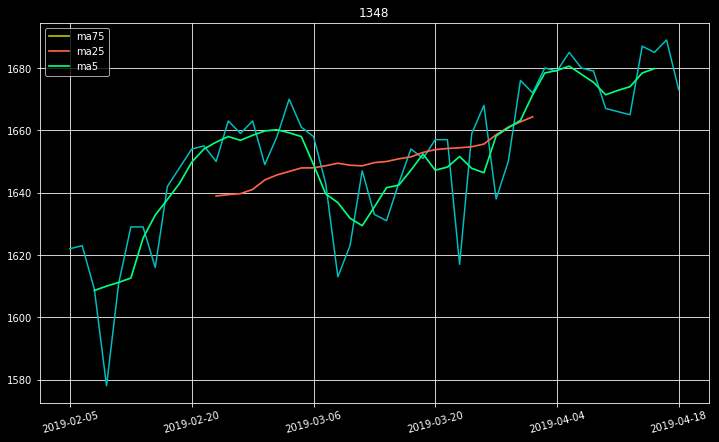

               始値     高値     安値     終値  出来高   終値調整
日付                                                
2019-04-18  12970  12990  12920  12990   26  12990
2019-04-17  12930  12980  12930  12980   35  12980
2019-04-16  12820  12900  12820  12900   20  12900
2019-04-15  12840  12900  12790  12790  108  12790
2019-04-12  12810  12820  12800  12810    8  12810


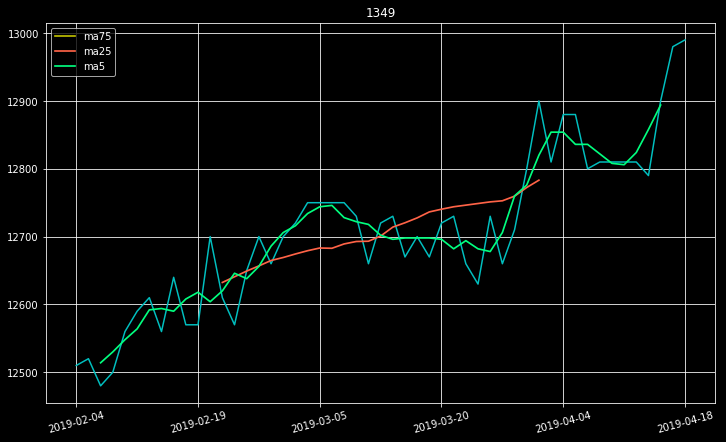

             始値   高値   安値   終値   出来高  終値調整
日付                                        
2019-04-18  857  857  845  852   600   852
2019-04-17  861  876  846  872  2200   872
2019-04-16  850  864  848  861  1000   861
2019-04-15  852  862  843  850  2500   850
2019-04-12  869  869  854  867   600   867


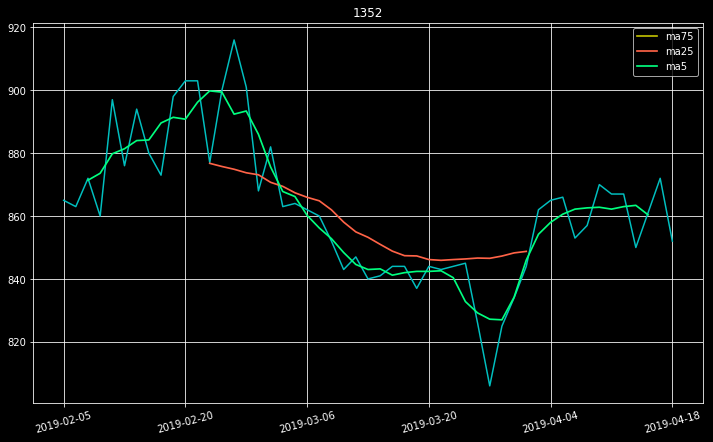

KeyboardInterrupt: 

In [99]:
### from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd
from tqdm import tqdm
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import re
from urllib import request
from openpyxl import Workbook
import openpyxl
%matplotlib inline


# stock_URL.csvの読み込み
url_list = pd.read_csv("page_URL.csv", index_col=0)
url_df = pd.DataFrame(url_list)
pages = {}

# ページを選択してそのページ内の企業urlを取得する
for page in tqdm(list(url_df.iloc[:,0]),desc='first'):
    u_page = page.split('=')[1]
    
    # pageを辞書に格納
    pages[u_page] = [page]
    
page_num = input("ページ数を入力:")   
page_s = pages[page_num]


# 入力したページのhtmlを取得
base_page = "".join(page_s)
html = request.urlopen(base_page)
soup = BeautifulSoup(html,"html.parser")
url = []

for t in tqdm(soup.find_all("a"),desc='second'):
    url.append(''.join(list(urljoin(base_page, t.get('href')))))
    
Table = pd.DataFrame(url)
# display(Table)


# 8〜128のfor文 
for Table_url in Table.iloc[range(8,128),0]:
#     print(Table)
    title = Table_url.split('/')[4]

    tables = pd.read_html(Table_url, flavor='bs4',index_col=0)
#     print(tables[0][0:3])
    dfs = pd.DataFrame(tables[0])
    print(dfs.head())

    x = dfs.index[50::-1]
#     x = x[50:]
    y = dfs.loc[:, ['終値']][50::-1]
#     y = y[50:]
    sma75 = pd.DataFrame.rolling(y, window=75, center=True).mean()
    sma25 = pd.DataFrame.rolling(y, window=25, center=True).mean()
    sma5 = pd.DataFrame.rolling(y, window=5, center=True).mean()

    plt.figure(figsize=(12,7))
    plt.plot(x, y, color='c')
    plt.plot(x, sma75, color='y', linewidth=1.7, label='ma75')
    plt.plot(x, sma25, color='tomato', linewidth=1.7, label='ma25')
    plt.plot(x, sma5, color='springgreen', linewidth=1.7, label='ma5')
    ticks = 10
    plt.xticks(x[::ticks], rotation=15)
    plt.title(title)
    plt.style.use('dark_background')
    plt.grid()
    plt.legend()
    plt.show()


In [59]:

import openpyxl
dfs.to_excel('/Users/tk/github/stock_scr/pandas_to_excel.xlsx')

.pyのファイルを一つのフォルダにまとめる
それをzipに圧縮する